In [158]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os

In [159]:
os.makedirs("figures", exist_ok=True)

In [185]:
df = pd.read_excel("../experiment_data/cleaned_df.xlsx")
eda_columns = ["Current Status", "Field of study", "Years of Experience", "Frequency For AI Tools", "AI Tools in IDE", "FB_3"]
df = df[eda_columns]

In [186]:
df["Current Status"] = df["Current Status"].map(lambda x: x.lower())
df["Field of study"] = df["Field of study"].map(lambda x: x.lower())


df["Field of study"] = df["Field of study"].map(
    lambda x: "software engineering" if "software engineer" in x
    else ("data science" if "data science" in x
    else ("computer science" if "computer science" in x
    else ("it management" if "it management" in x else x)))
)

df["Current Status"] = df["Current Status"].map(
    lambda x: "master student" if "magistrale" in x
    else (x))

df["Current Status"] = df["Current Status"].map(lambda x: x.capitalize())
df["Field of study"] = df["Field of study"].map(lambda x: x.capitalize())

In [187]:
df.head(19)

,Current Status,Field of study,Years of Experience,Frequency For AI Tools,AI Tools in IDE,FB_3
0,Master student,Software engineering,4-5,Always (nearly every working hour),Yes,TARS
1,Bachelor student,Computer science,6 or more years,Frequently (daily),No,TARS
2,Master student,Software engineering,4-5,Very Frequently (multiple times a day),Yes,TARS
3,Bachelor student,Computer science,2-3,Very Frequently (multiple times a day),No,TARS
4,Master student,Data science,4-5,Frequently (daily),No,TARS
5,Master student,Computer science,6 or more years,Frequently (daily),Yes,TARS
6,Phd student,Computer science,6 or more years,Frequently (daily),No,No Preference
7,Professional developer,Data science,4-5,Always (nearly every working hour),Yes,TARS
8,Master student,Software engineering,4-5,Very Frequently (multiple times a day),Yes,TARS
9,Master student,Software engineering,4-5,Frequently (daily),Yes,TARS


In [188]:
# 1. Basic info
print("Number of respondents:", len(df))

Number of respondents: 18


In [189]:
plt.rcParams['figure.dpi'] = 300  # DPI per la visualizzazione
plt.rcParams['savefig.dpi'] = 300  # DPI per il salvataggio
plt.rcParams['savefig.format'] = 'png'  # o 'pdf' per vettoriale
plt.rcParams['savefig.bbox'] = 'tight'  # Taglia i bordi bianchi
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

Current Status
Master student            55.6%
Bachelor student          22.2%
Phd student                5.6%
Professional developer     5.6%
Teacher in high school     5.6%
Postdoc                    5.6%
Name: proportion, dtype: object


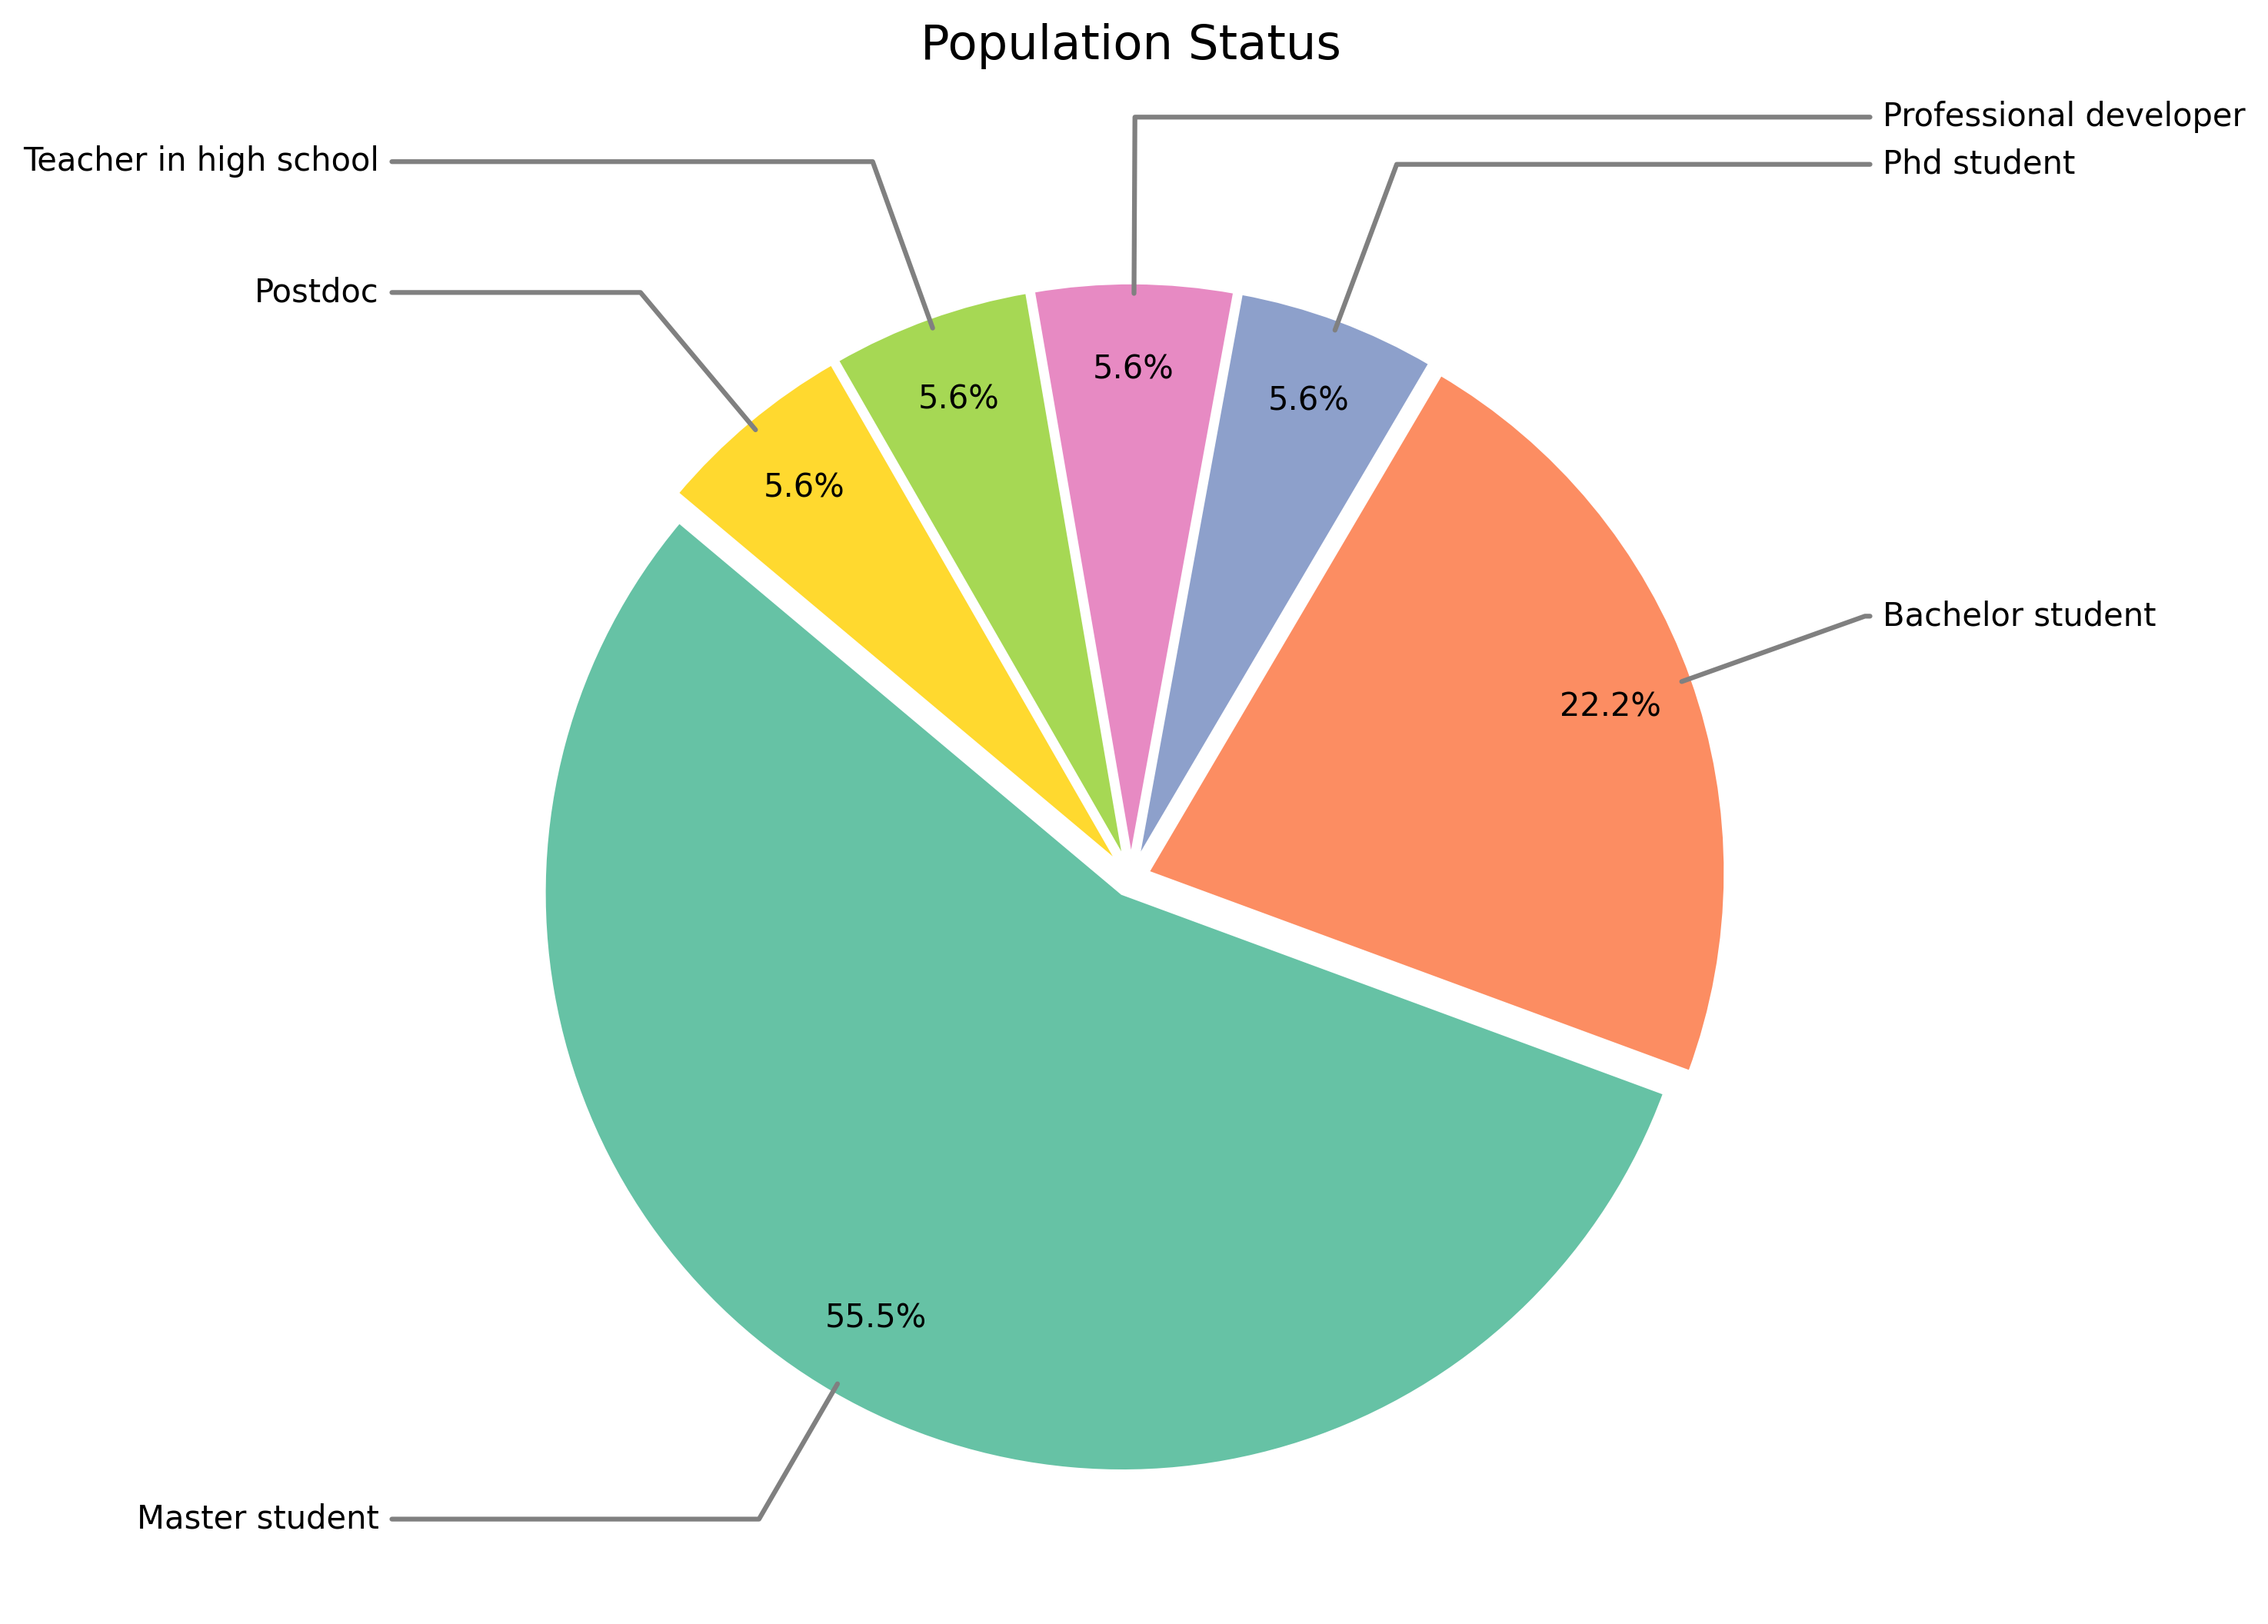

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Distribution by Current Status
status_counts = df['Current Status'].value_counts(normalize=True).mul(100).round(1)
print(df['Current Status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
colors = sns.color_palette("Set2", len(status_counts))
explode = [0.03] * len(status_counts)

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=False,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2, 'linestyle': 'solid'},
    pctdistance=0.85,
    labeldistance=1.1,
    textprops={'fontsize': 10}
)

# Aggiungi le linee di connessione
for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    
    plt.annotate(
        texts[i].get_text(),
        xy=(x, y),
        xytext=(1.3 * np.sign(x), 1.3 * y),
        horizontalalignment=horizontalalignment,
        fontsize=10,
        #bbox=dict(boxstyle="round,pad=0.3", facecolor=colors[i], alpha=0.3),
        arrowprops=dict(
            arrowstyle="-",
            connectionstyle=connectionstyle,
            color='gray',
            linewidth=1.5
        )
    )
    texts[i].set_visible(False)

plt.title("Population Status", fontsize=15, pad=30)
plt.tight_layout()

plt.savefig("figures/current_status_distribution.pdf", 
            format='pdf',
            bbox_inches='tight',
            facecolor='white')
plt.show()

Field of study
Computer science        61.1%
Software engineering    27.8%
Data science            11.1%
Name: proportion, dtype: object


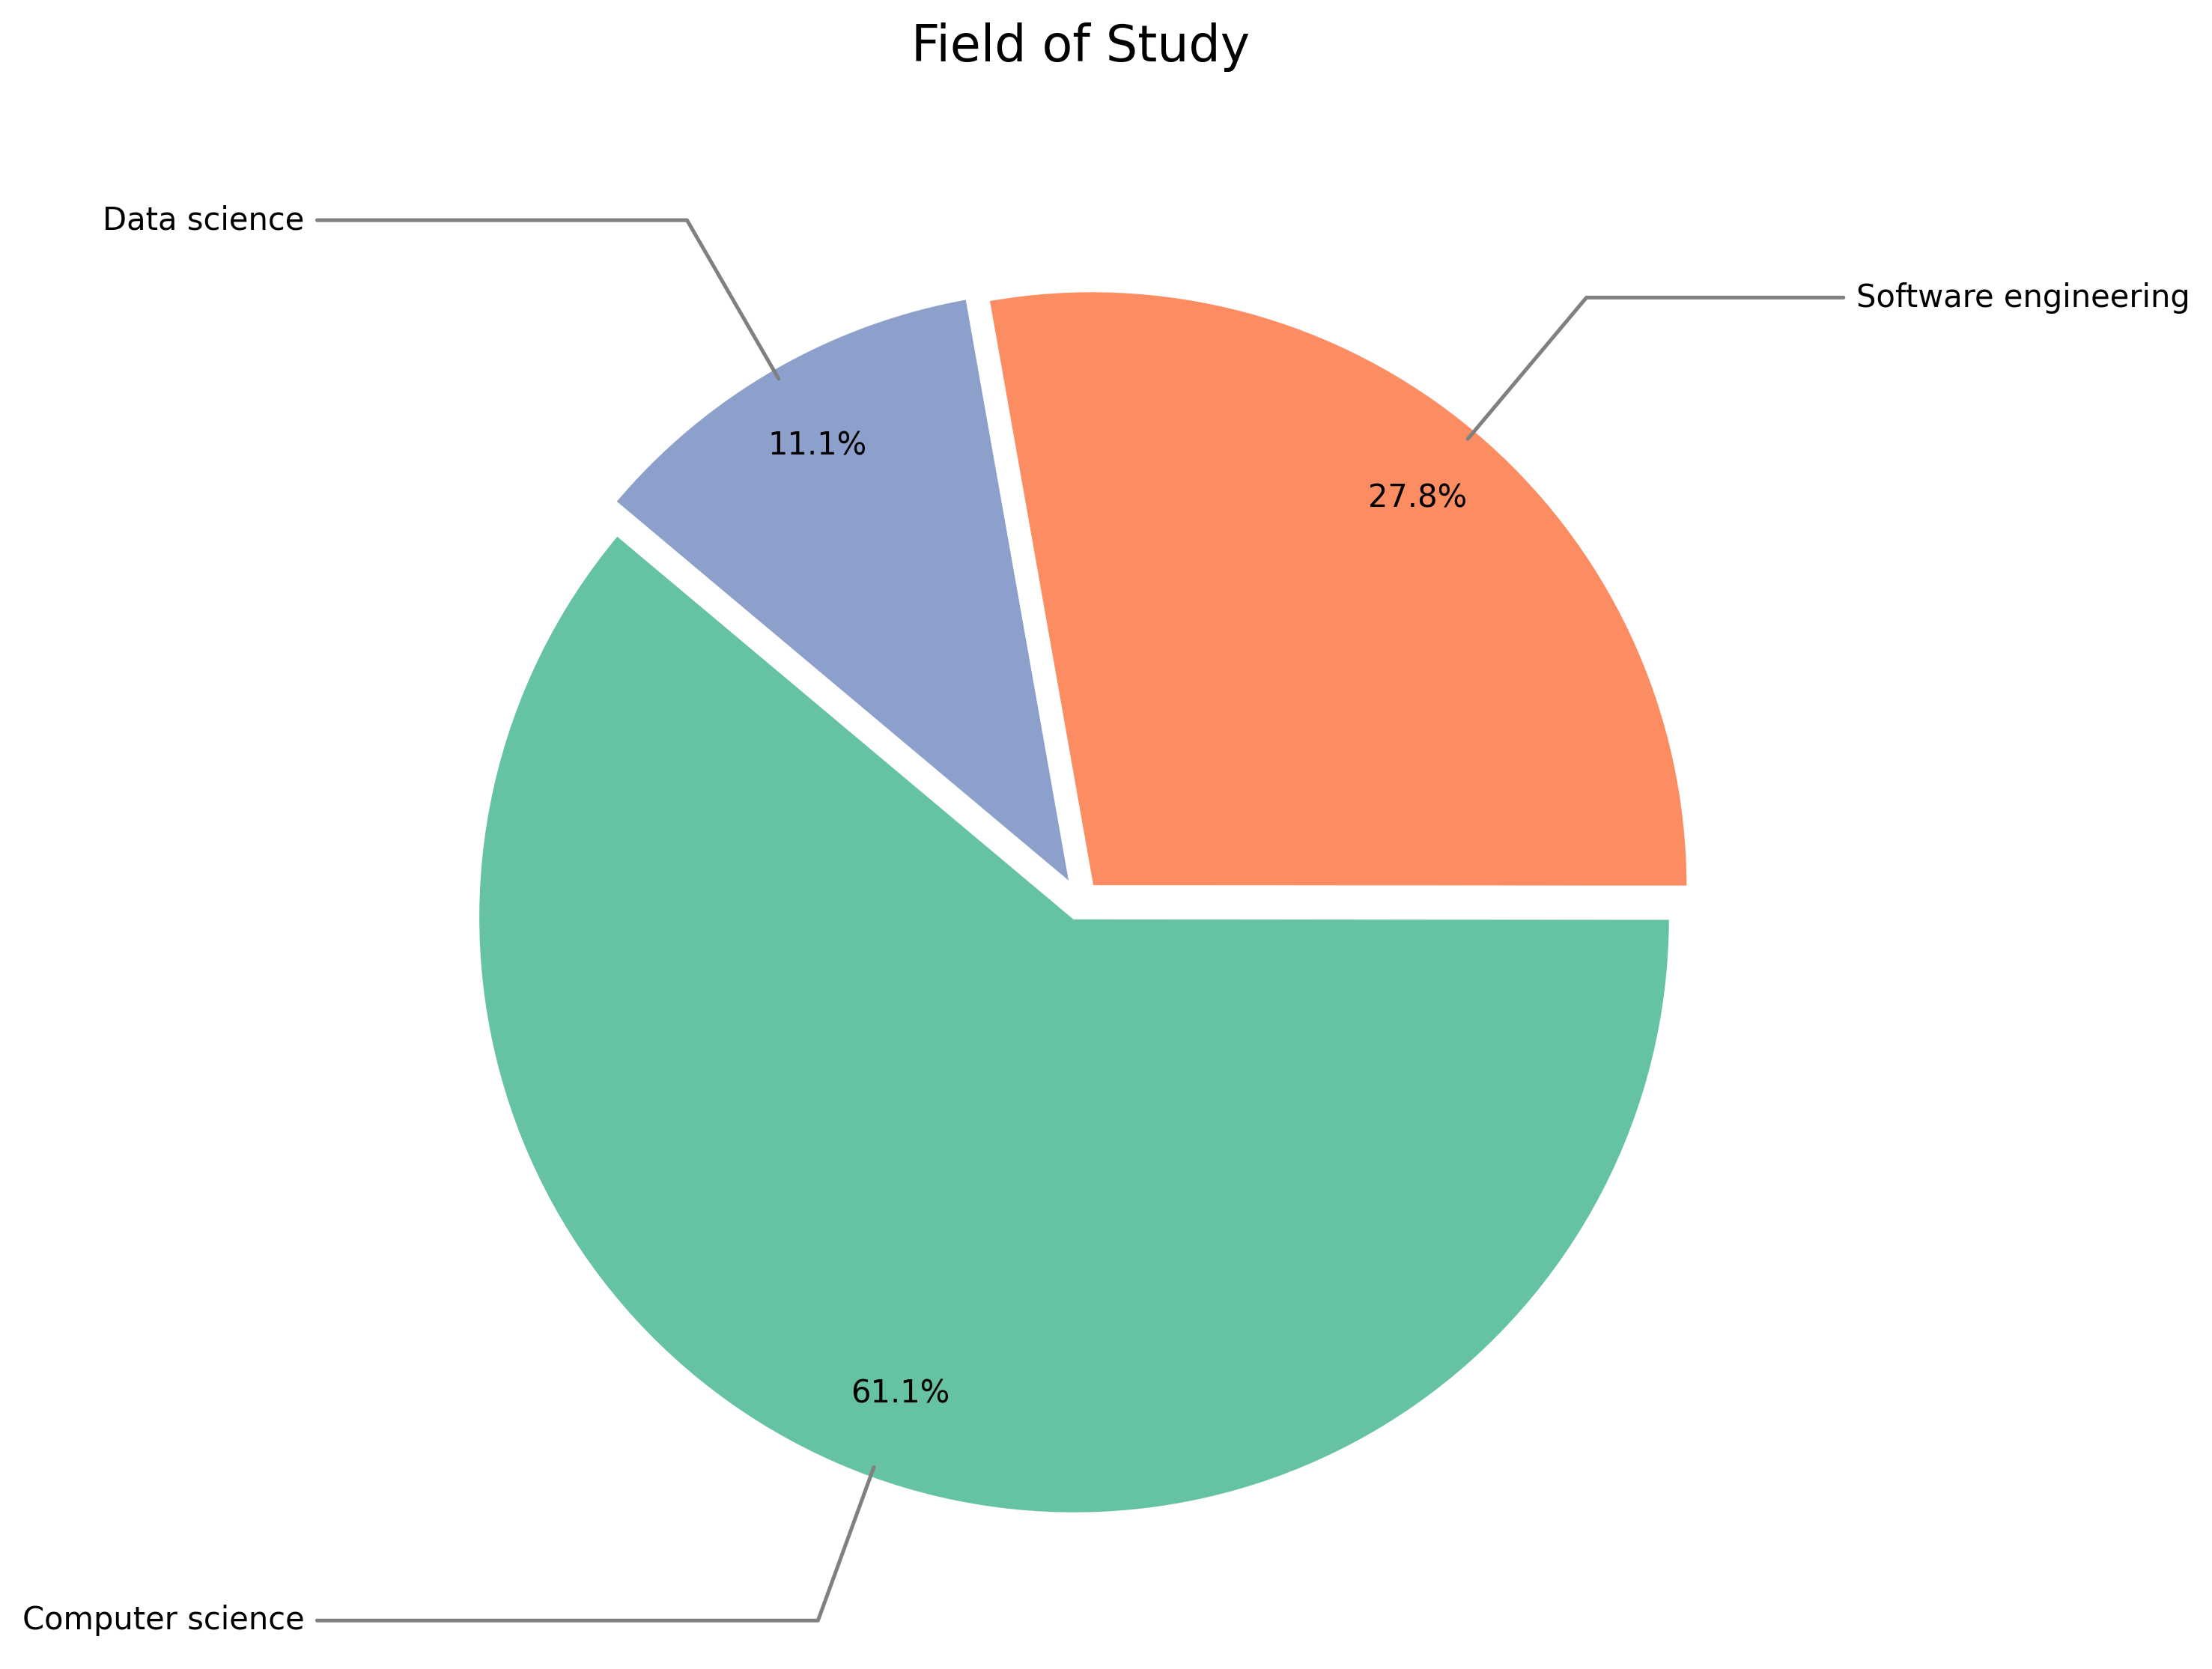

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 3. Field of Study
field_counts = df['Field of study'].value_counts(normalize=True).mul(100).round(1)
print(df['Field of study'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
colors = sns.color_palette("Set2", len(field_counts))
explode = [0.03] * len(field_counts)

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    field_counts,
    labels=field_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=False,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2, 'linestyle': 'solid'},
    pctdistance=0.85,
    labeldistance=1.1,
    textprops={'fontsize': 10}
)

# Aggiungi le linee di connessione
for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    
    plt.annotate(
        texts[i].get_text(),
        xy=(x, y),
        xytext=(1.3 * np.sign(x), 1.3 * y),
        horizontalalignment=horizontalalignment,
        fontsize=10,
        arrowprops=dict(
            arrowstyle="-",
            connectionstyle=connectionstyle,
            color='gray',
            linewidth=1.2
        )
    )
    texts[i].set_visible(False)

plt.title("Field of Study", fontsize=16, pad=30, ha='center', loc='center')
plt.tight_layout()

plt.savefig("figures/field_of_study_distribution.pdf", 
            format='pdf',
            bbox_inches='tight',
            facecolor='white')
plt.show()

Years of Experience
4-5                50.0%
6 or more years    38.9%
2-3                 5.6%
0-1                 5.6%
Name: proportion, dtype: object


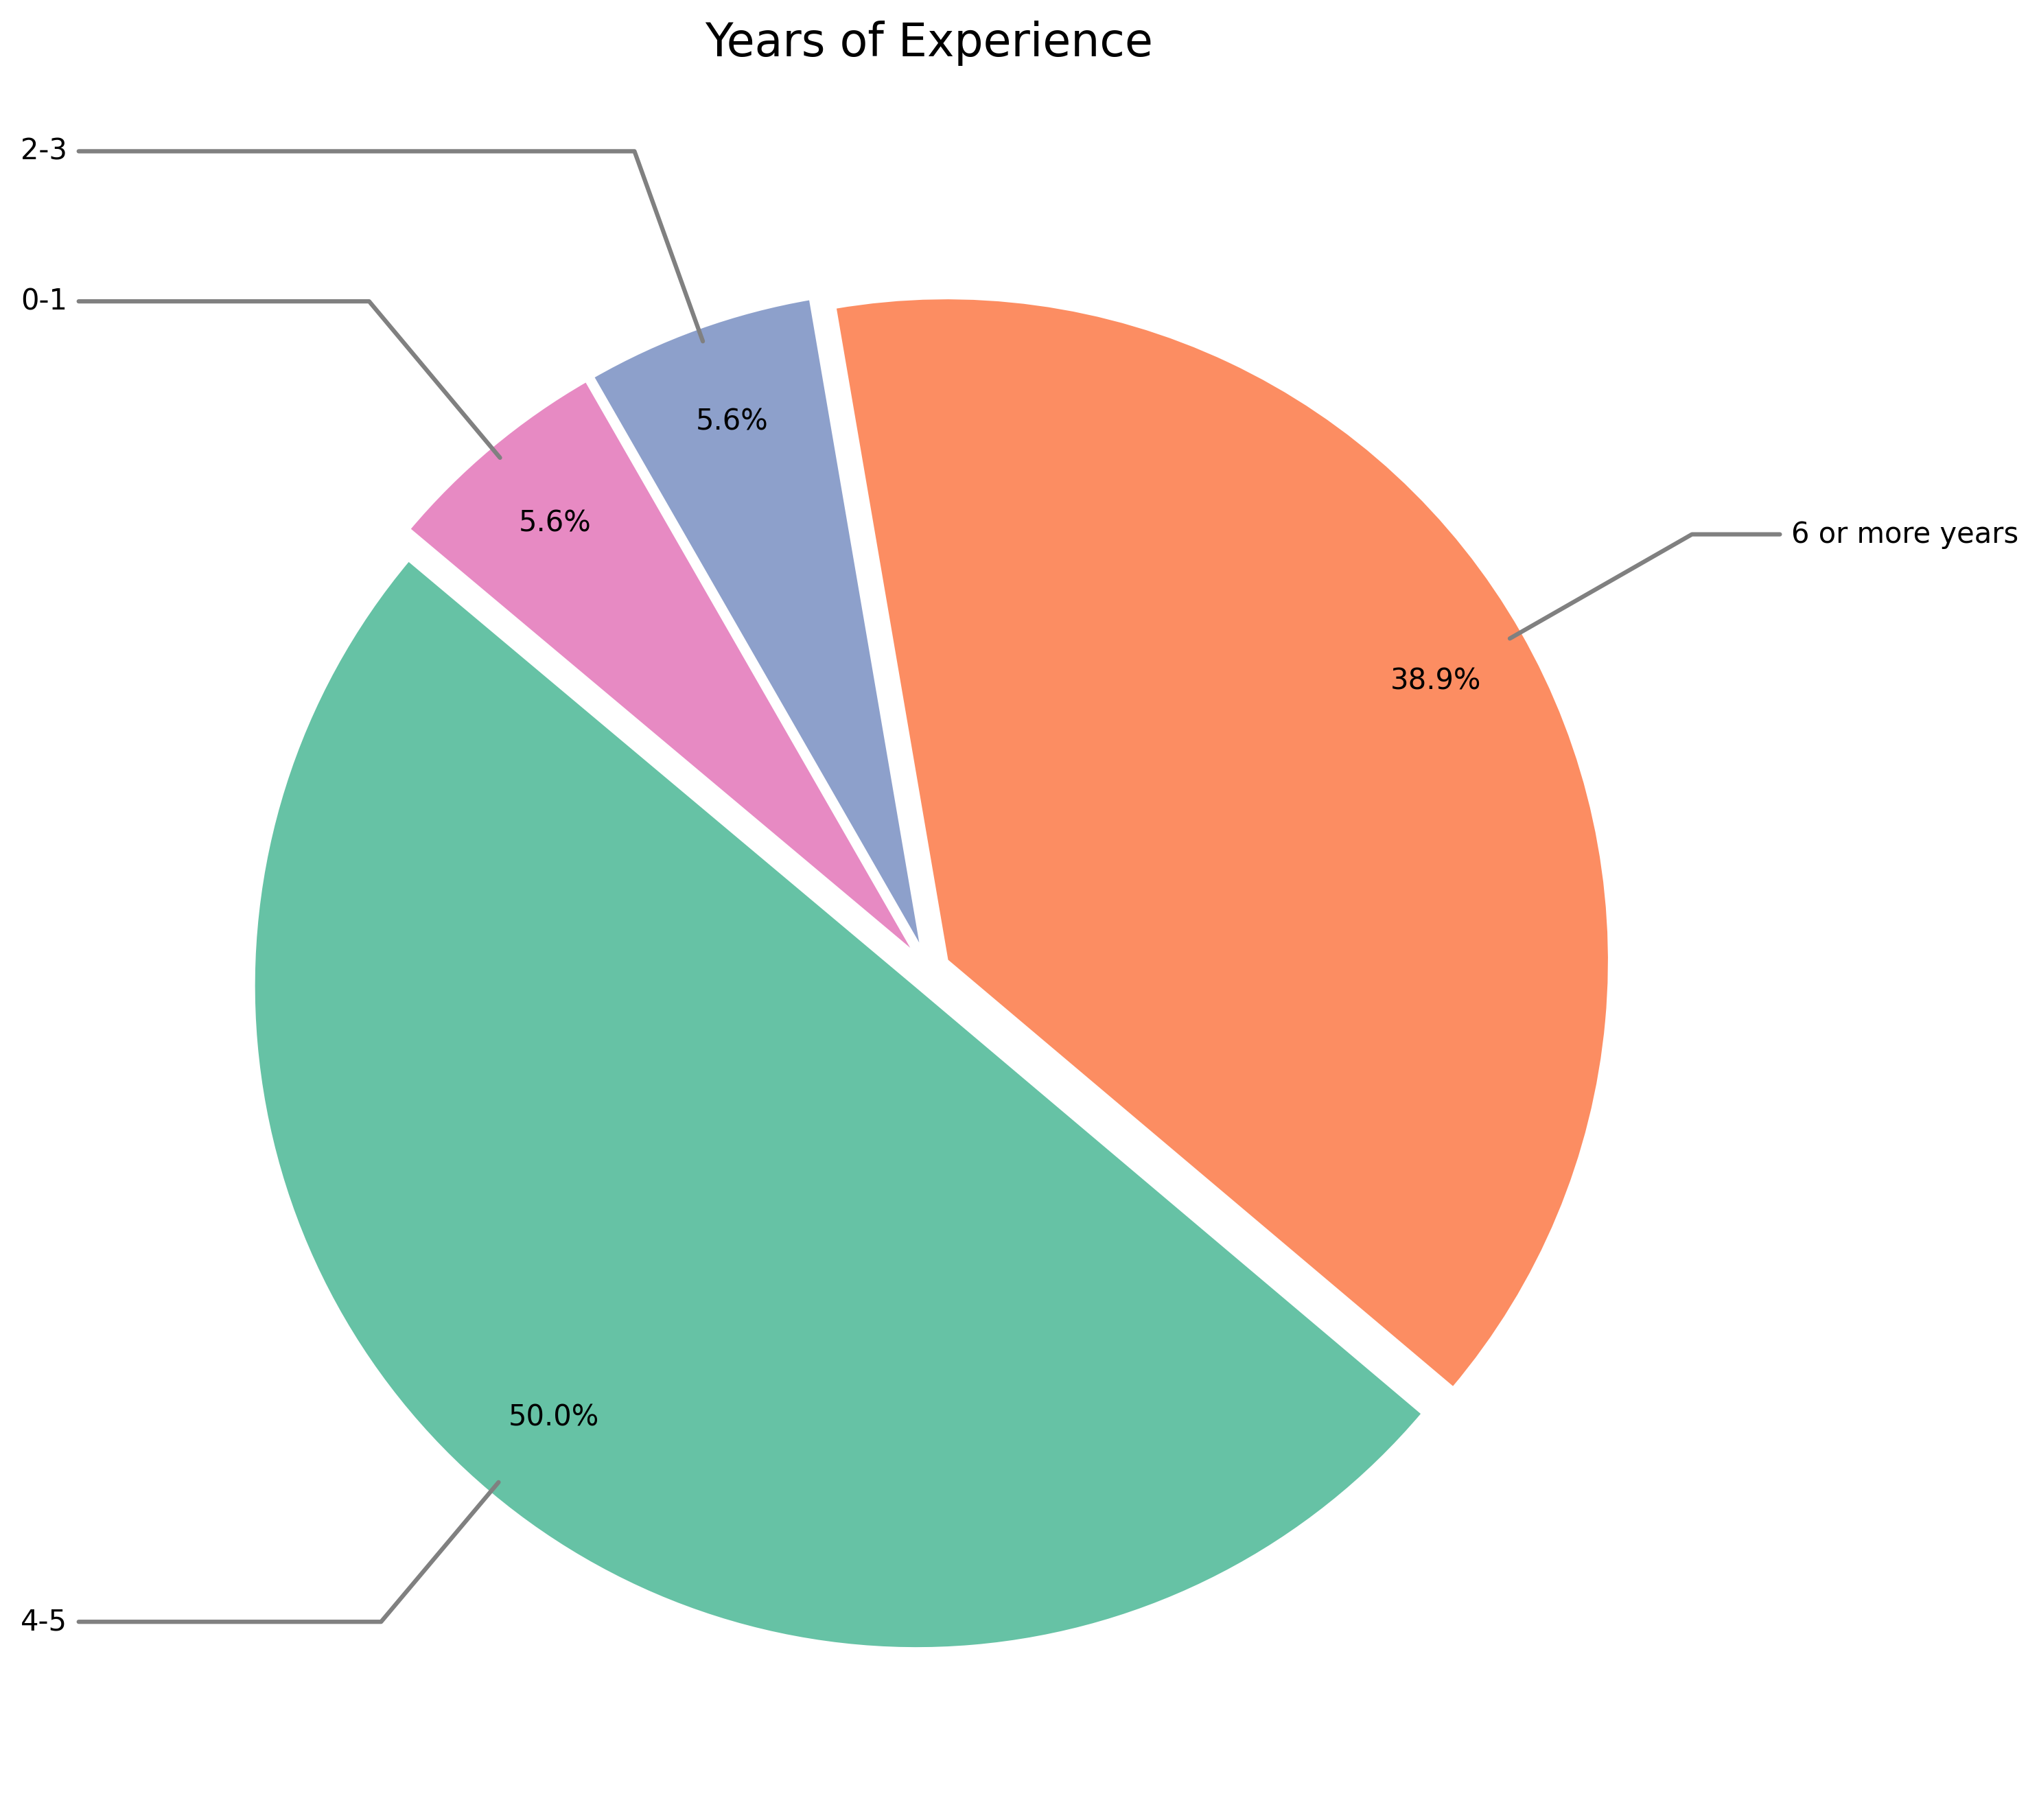

In [192]:
# 4. Years of Experience
experience_counts = df['Years of Experience'].value_counts(normalize=True).mul(100).round(1)
print(df['Years of Experience'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
colors = sns.color_palette("Set2", len(experience_counts))
explode = [0.03] * len(experience_counts)

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    experience_counts,
    labels=experience_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=False,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2, 'linestyle': 'solid'},
    pctdistance=0.85,
    labeldistance=1.1,
    textprops={'fontsize': 10}
)

# Aggiungi le linee di connessione
for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    
    plt.annotate(
        texts[i].get_text(),
        xy=(x, y),
        xytext=(1.3 * np.sign(x), 1.3 * y),
        horizontalalignment=horizontalalignment,
        fontsize=10,
        arrowprops=dict(
            arrowstyle="-",
            connectionstyle=connectionstyle,
            color='gray',
            linewidth=1.5
        )
    )
    texts[i].set_visible(False)

plt.title("Years of Experience", fontsize=16, pad=30)
plt.tight_layout()

# Salva il grafico
plt.savefig("figures/years_of_experience_distribution.pdf", 
            format='pdf',
            bbox_inches='tight',
            facecolor='white')
plt.show()

Frequency For AI Tools
Frequently (daily)                          44.4%
Always (nearly every working hour)          16.7%
Very Frequently (multiple times a day)      16.7%
Occasionally (Few Times every two weeks)    16.7%
Rarely (Few Times a month)                   5.6%
Name: proportion, dtype: object


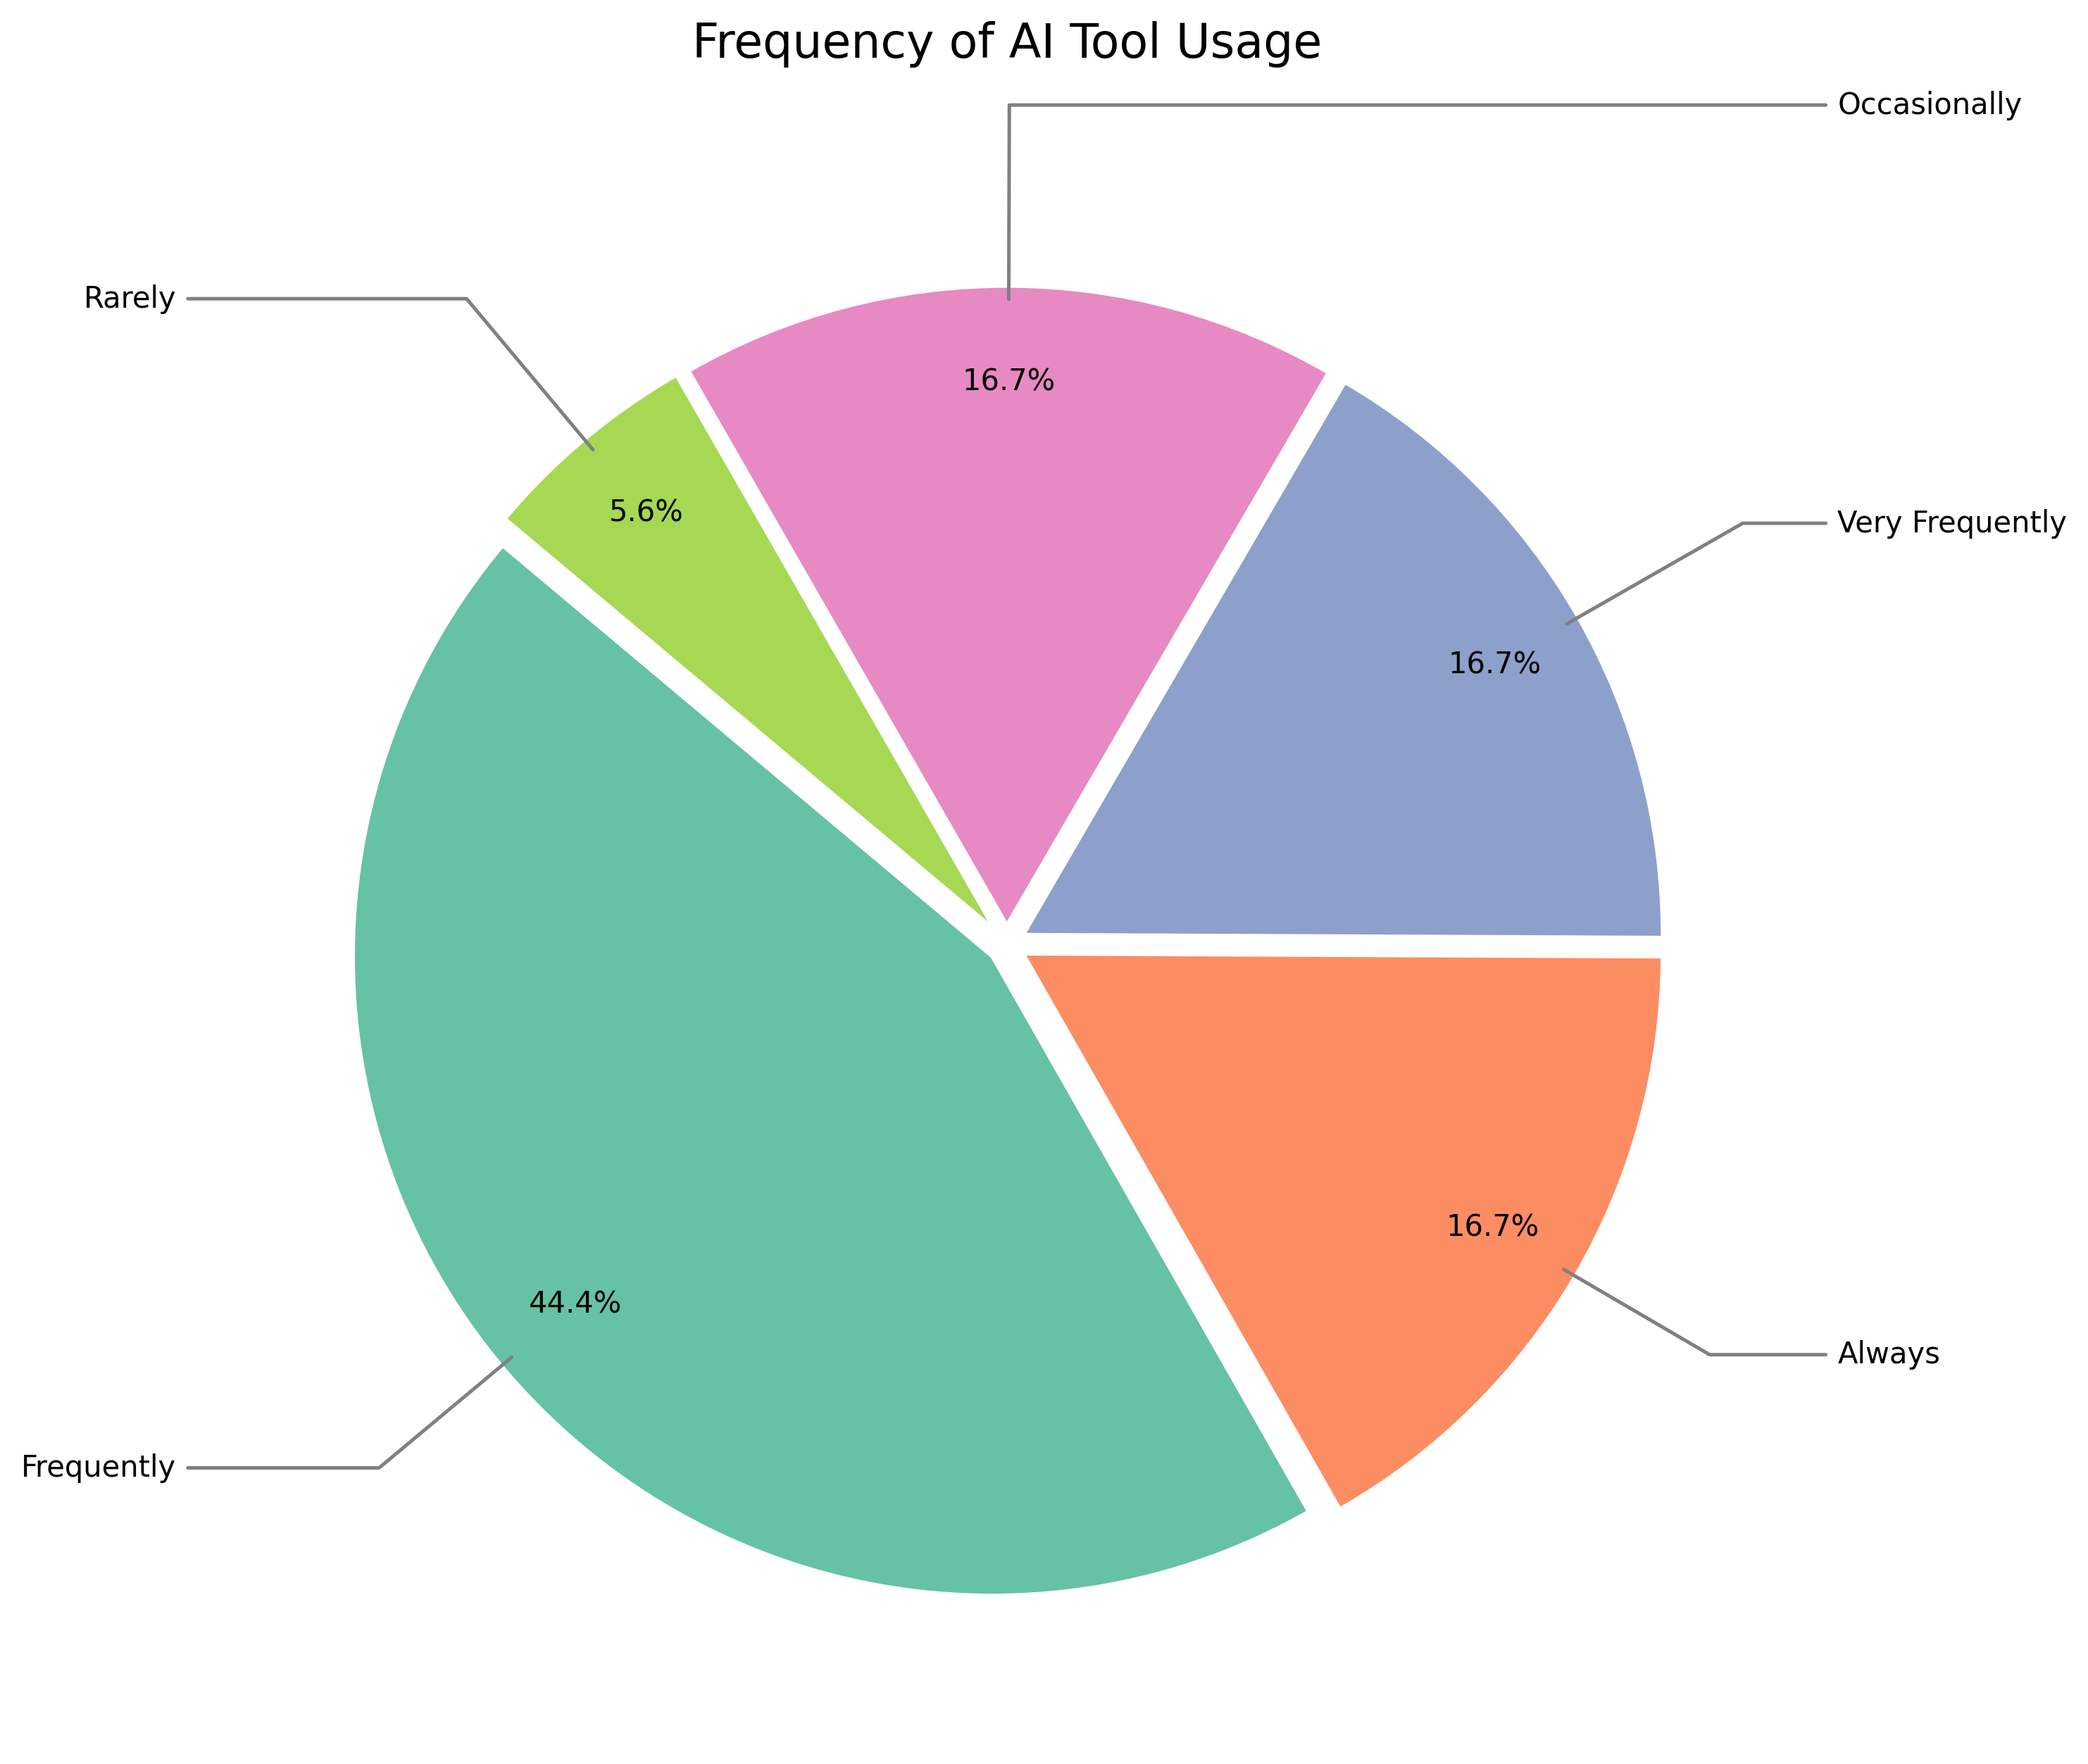

In [193]:
# 5. Frequency of AI Tool Usage
frequency_counts = df['Frequency For AI Tools'].value_counts(normalize=True).mul(100).round(1)
print(df['Frequency For AI Tools'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
colors = sns.color_palette("Set2", len(frequency_counts))
explode = [0.03] * len(frequency_counts)

labels = [label.split(" (")[0] for label in frequency_counts.index]

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    frequency_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=False,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2, 'linestyle': 'solid'},
    pctdistance=0.85,
    labeldistance=1.1,
    textprops={'fontsize': 10}
)

# Aggiungi le linee di connessione
for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    
    plt.annotate(
        texts[i].get_text(),
        xy=(x, y),
        xytext=(1.3 * np.sign(x), 1.3 * y),
        horizontalalignment=horizontalalignment,
        fontsize=10,
        arrowprops=dict(
            arrowstyle="-",
            connectionstyle=connectionstyle,
            color='gray',
            linewidth=1.2
        )
    )
    texts[i].set_visible(False)

plt.title("Frequency of AI Tool Usage", fontsize=16, pad=30, ha="center", loc="center")
plt.tight_layout()

# Salva il grafico
plt.savefig("figures/frequency_ai_tools_usage.pdf", 
            format='pdf',
            bbox_inches='tight',
            facecolor='white')
plt.show()

AI Tools in IDE
Yes    66.7%
No     33.3%
Name: proportion, dtype: object


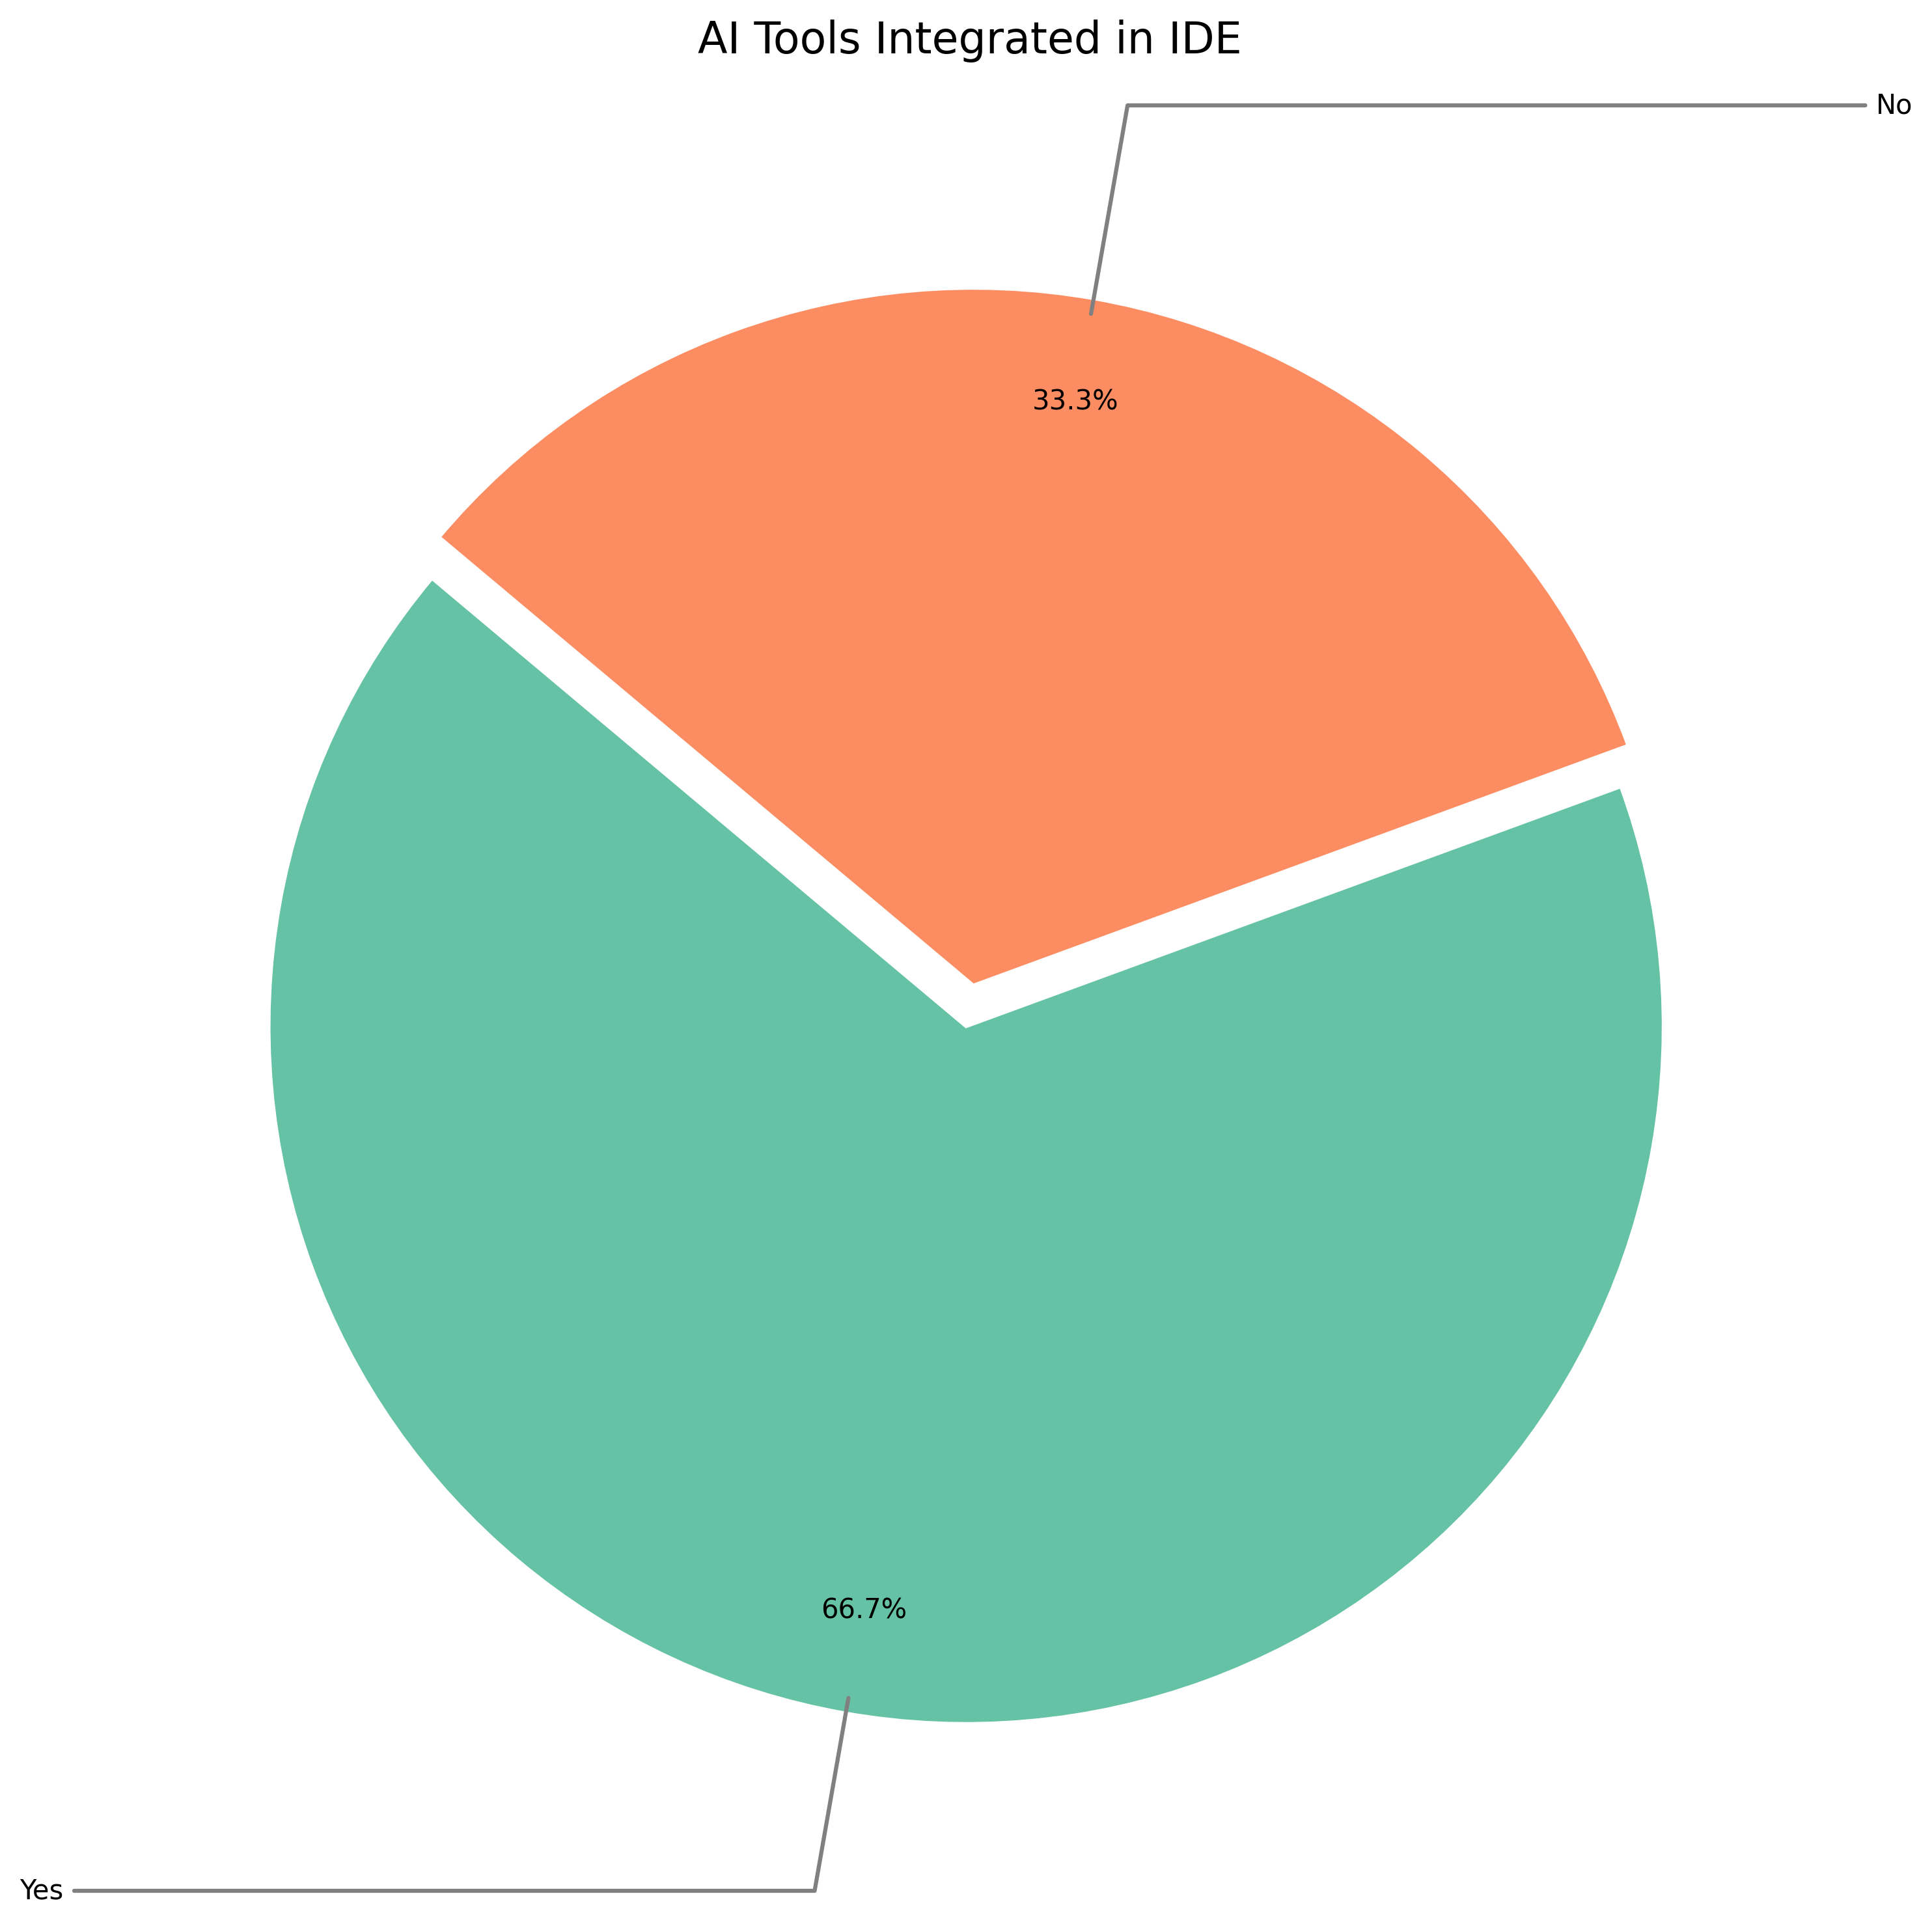

In [194]:
# 6. AI Tools integrated in IDE
ide_counts = df['AI Tools in IDE'].value_counts(normalize=True).mul(100).round(1)
print(df['AI Tools in IDE'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
colors = sns.color_palette("Set2", len(ide_counts))
explode = [0.03] * len(ide_counts)

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    ide_counts,
    labels=ide_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=False,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2, 'linestyle': 'solid'},
    pctdistance=0.85,
    labeldistance=1.1,
    textprops={'fontsize': 10}
)

# Aggiungi le linee di connessione
for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    
    plt.annotate(
        texts[i].get_text(),
        xy=(x, y),
        xytext=(1.3 * np.sign(x), 1.3 * y),
        horizontalalignment=horizontalalignment,
        fontsize=10,
        arrowprops=dict(
            arrowstyle="-",
            connectionstyle=connectionstyle,
            color='gray',
            linewidth=1.5
        )
    )
    texts[i].set_visible(False)

plt.title("AI Tools Integrated in IDE", fontsize=16, pad=30)
plt.tight_layout()

# Salva il grafico come PDF
plt.savefig("figures/ai_tools_in_ide.pdf", format='pdf', bbox_inches='tight')
plt.show()

Grafico salvato come 'figures/combined_ai_usage_charts.pdf'


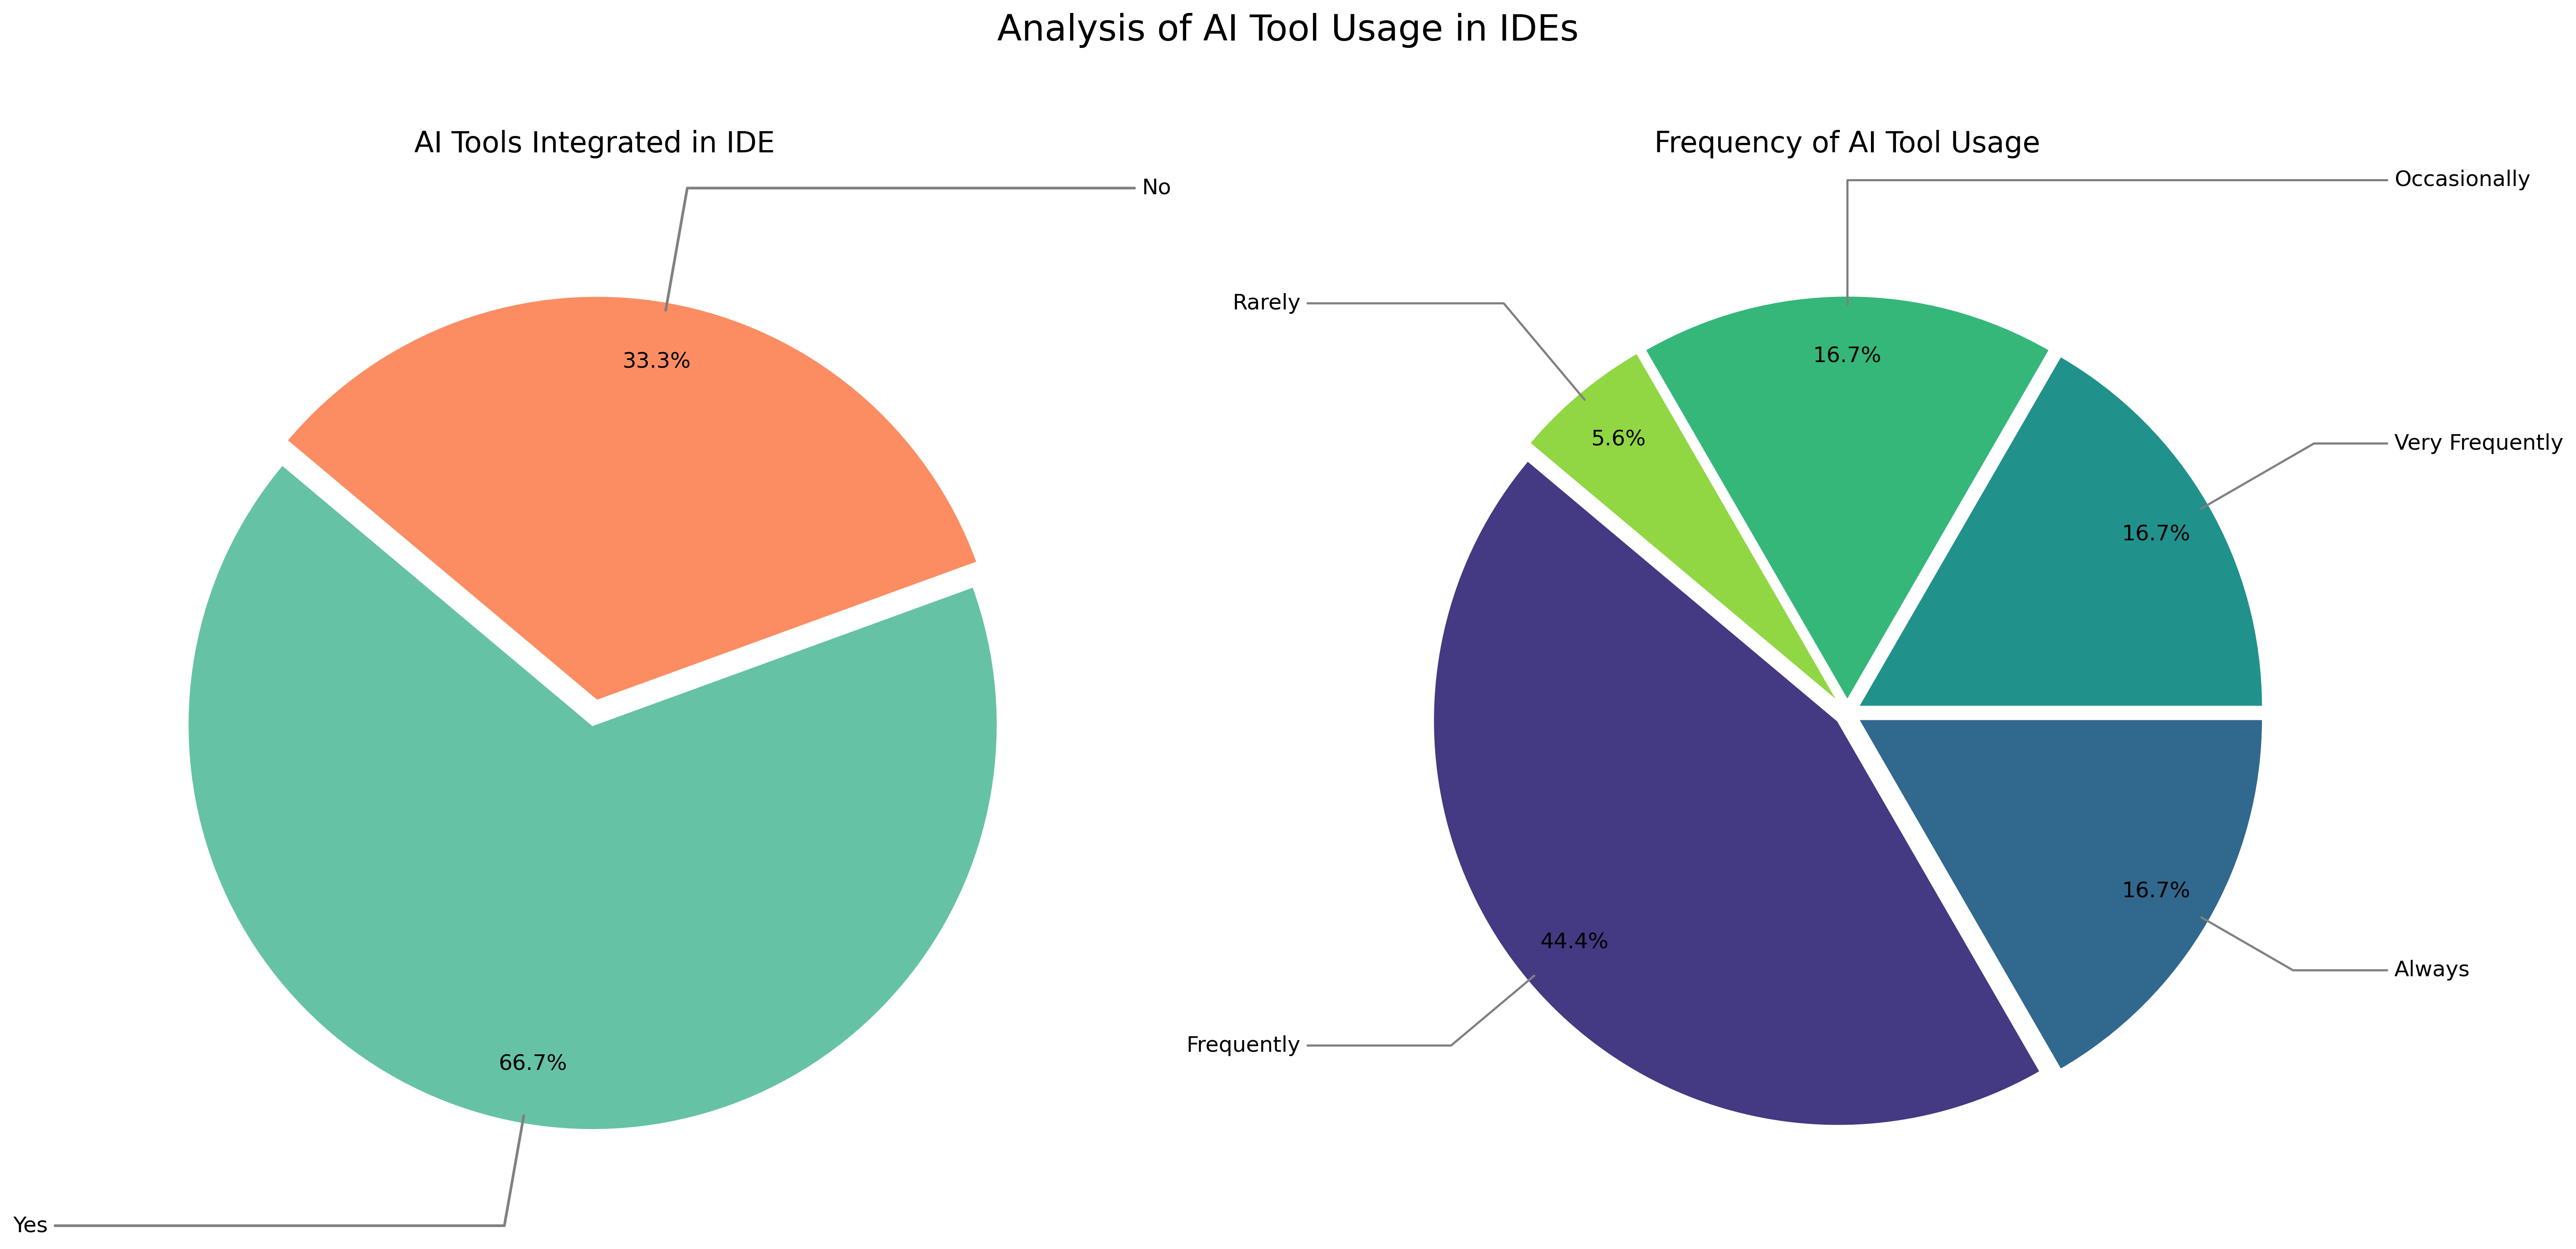

In [205]:

# 1. Prepara i dati per entrambi i grafici
ide_counts = df['AI Tools in IDE'].value_counts(normalize=True).mul(100)
frequency_counts = df['Frequency For AI Tools'].value_counts(normalize=True).mul(100)

# --- Creazione del Grafico Combinato ---
# Crea una figura con 1 riga e 2 colonne di subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Analysis of AI Tool Usage in IDEs', fontsize=20, y=0.98)


# --- Grafico 1: AI Tools integrated in IDE ---
colors1 = sns.color_palette("Set2", len(ide_counts))
explode1 = [0.03] * len(ide_counts)

wedges1, texts1, autotexts1 = ax1.pie(
    ide_counts,
    labels=ide_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors1,
    explode=explode1,
    shadow=False,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2, 'linestyle': 'solid'},
    pctdistance=0.85,
    labeldistance=1.1,
    textprops={'fontsize': 12}
)

# Aggiungi le linee di connessione per il Grafico 1
for i, wedge in enumerate(wedges1):
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    
    ax1.annotate(
        texts1[i].get_text(),
        xy=(x, y),
        xytext=(1.35 * np.sign(x), 1.3 * y), # Aumentato xytext per più spazio
        horizontalalignment=horizontalalignment,
        fontsize=12,
        arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle, color='gray', linewidth=1.5)
    )
    texts1[i].set_visible(False)

ax1.set_title("AI Tools Integrated in IDE", fontsize=16, pad=30)


# --- Grafico 2: Frequency of AI Tool Usage ---
colors2 = sns.color_palette("viridis", len(frequency_counts))
explode2 = [0.03] * len(frequency_counts)
labels2 = [label.split(" (")[0] for label in frequency_counts.index]

wedges2, texts2, autotexts2 = ax2.pie(
    frequency_counts,
    labels=labels2,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors2,
    explode=explode2,
    shadow=False,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2, 'linestyle': 'solid'},
    pctdistance=0.85,
    labeldistance=1.1,
    textprops={'fontsize': 12}
)

# Aggiungi le linee di connessione per il Grafico 2
for i, wedge in enumerate(wedges2):
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    
    ax2.annotate(
        texts2[i].get_text(),
        xy=(x, y),
        xytext=(1.35 * np.sign(x), 1.3 * y), # Aumentato xytext per più spazio
        horizontalalignment=horizontalalignment,
        fontsize=12,
        arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle, color='gray', linewidth=1.2)
    )
    texts2[i].set_visible(False)

ax2.set_title("Frequency of AI Tool Usage", fontsize=16, pad=30)


# --- Salvataggio e Visualizzazione ---
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Aggiusta il layout per fare spazio al titolo principale

# Assicurati che la cartella 'figures' esista
import os
if not os.path.exists('figures'):
    os.makedirs('figures')

# Salva il grafico come PDF
plt.savefig("figures/combined_ai_usage_charts.pdf", format='pdf', bbox_inches='tight', facecolor='white')
print("Grafico salvato come 'figures/combined_ai_usage_charts.pdf'")

plt.show()


In [195]:
# 7. Cross-tab
print(pd.crosstab(df['Current Status'], df['AI Tools in IDE'], normalize='index').round(2))

AI Tools in IDE           No   Yes
Current Status                    
Bachelor student        0.75  0.25
Master student          0.10  0.90
Phd student             1.00  0.00
Postdoc                 0.00  1.00
Professional developer  0.00  1.00
Teacher in high school  1.00  0.00


### Task preference: TARS or Manual?

In [198]:
df["FB_3"].value_counts()

FB_3
TARS             16
No Preference     2
Name: count, dtype: int64

CROSS-COLUMN ANALYSIS: FB_3 vs Other Variables

1. FB_3 vs Current Status
--------------------------------------------------------------------------------
FB_3                    No Preference   TARS
Current Status                              
Bachelor student                  0.0  100.0
Master student                    0.0  100.0
Phd student                     100.0    0.0
Postdoc                         100.0    0.0
Professional developer            0.0  100.0
Teacher in high school            0.0  100.0


<Figure size 3600x1800 with 0 Axes>

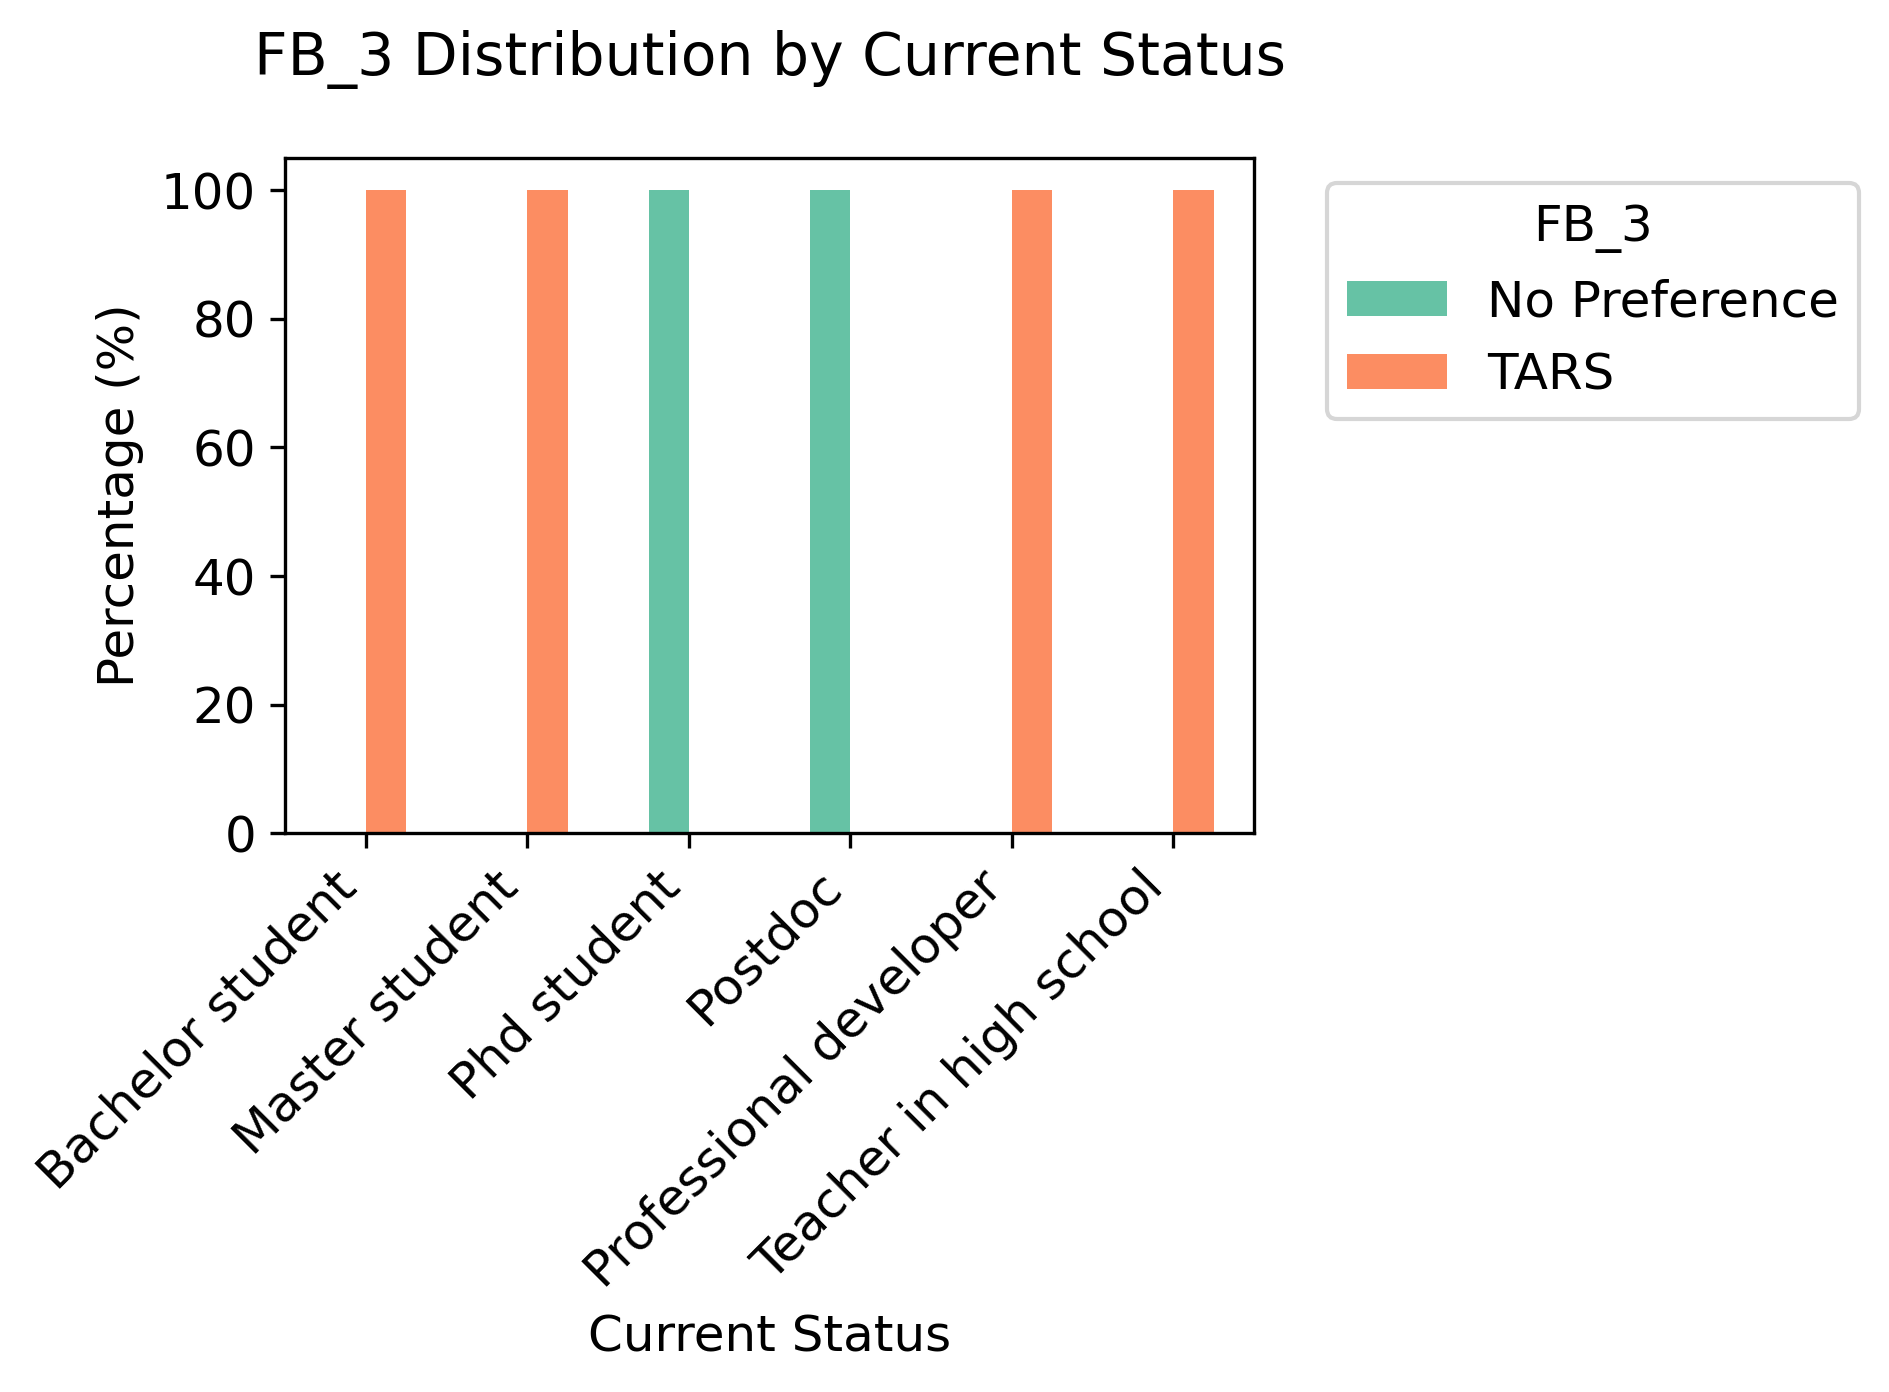


2. FB_3 vs Field of Study
--------------------------------------------------------------------------------
FB_3                  No Preference   TARS
Field of study                            
Computer science                9.1   90.9
Data science                    0.0  100.0
Software engineering           20.0   80.0


<Figure size 3600x1800 with 0 Axes>

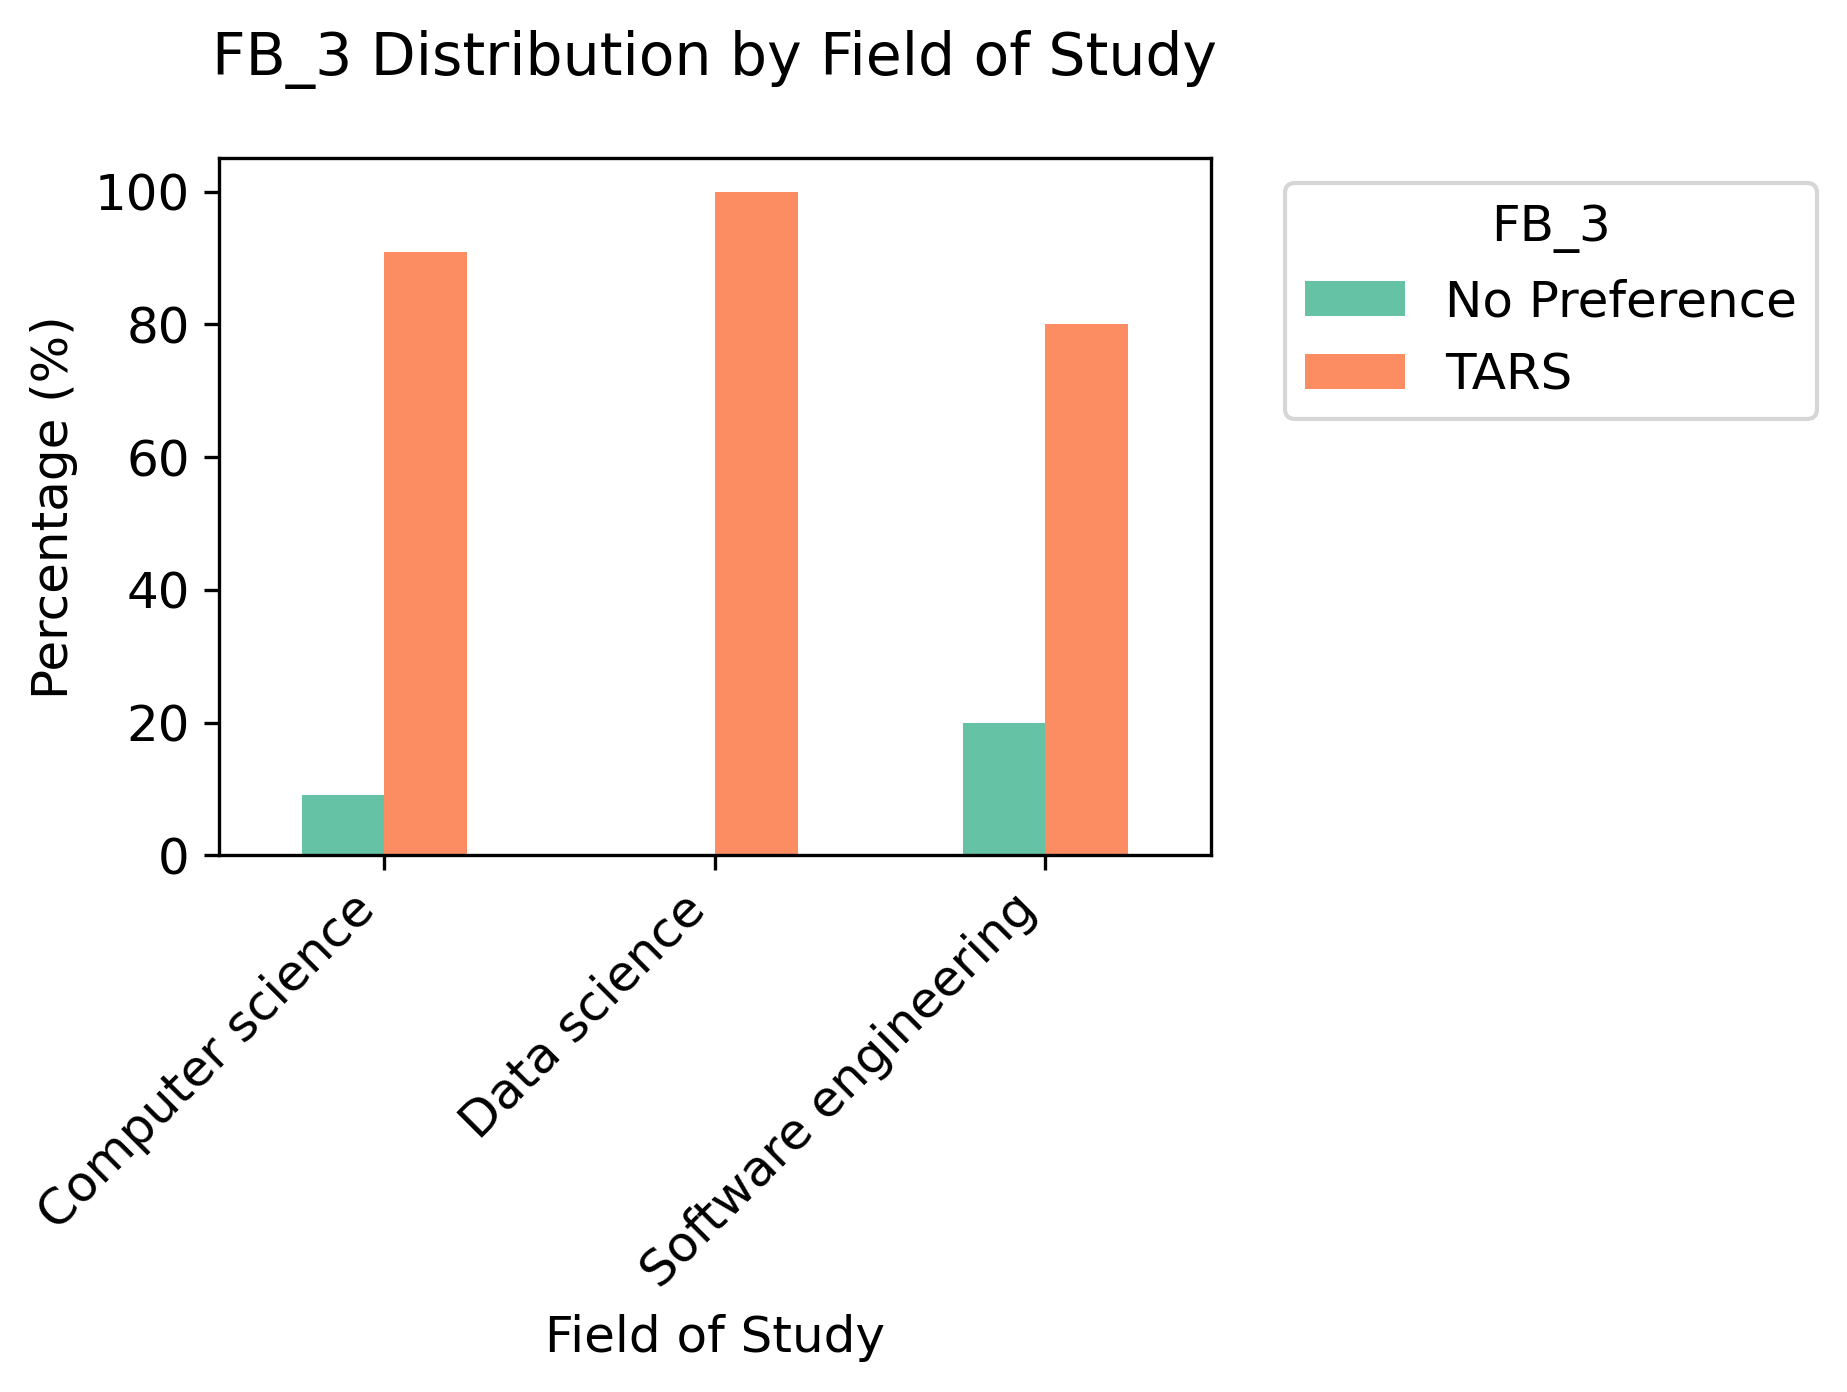


3. FB_3 vs Years of Experience
--------------------------------------------------------------------------------
FB_3                 No Preference   TARS
Years of Experience                      
0-1                            0.0  100.0
2-3                            0.0  100.0
4-5                            0.0  100.0
6 or more years               28.6   71.4


<Figure size 3600x1800 with 0 Axes>

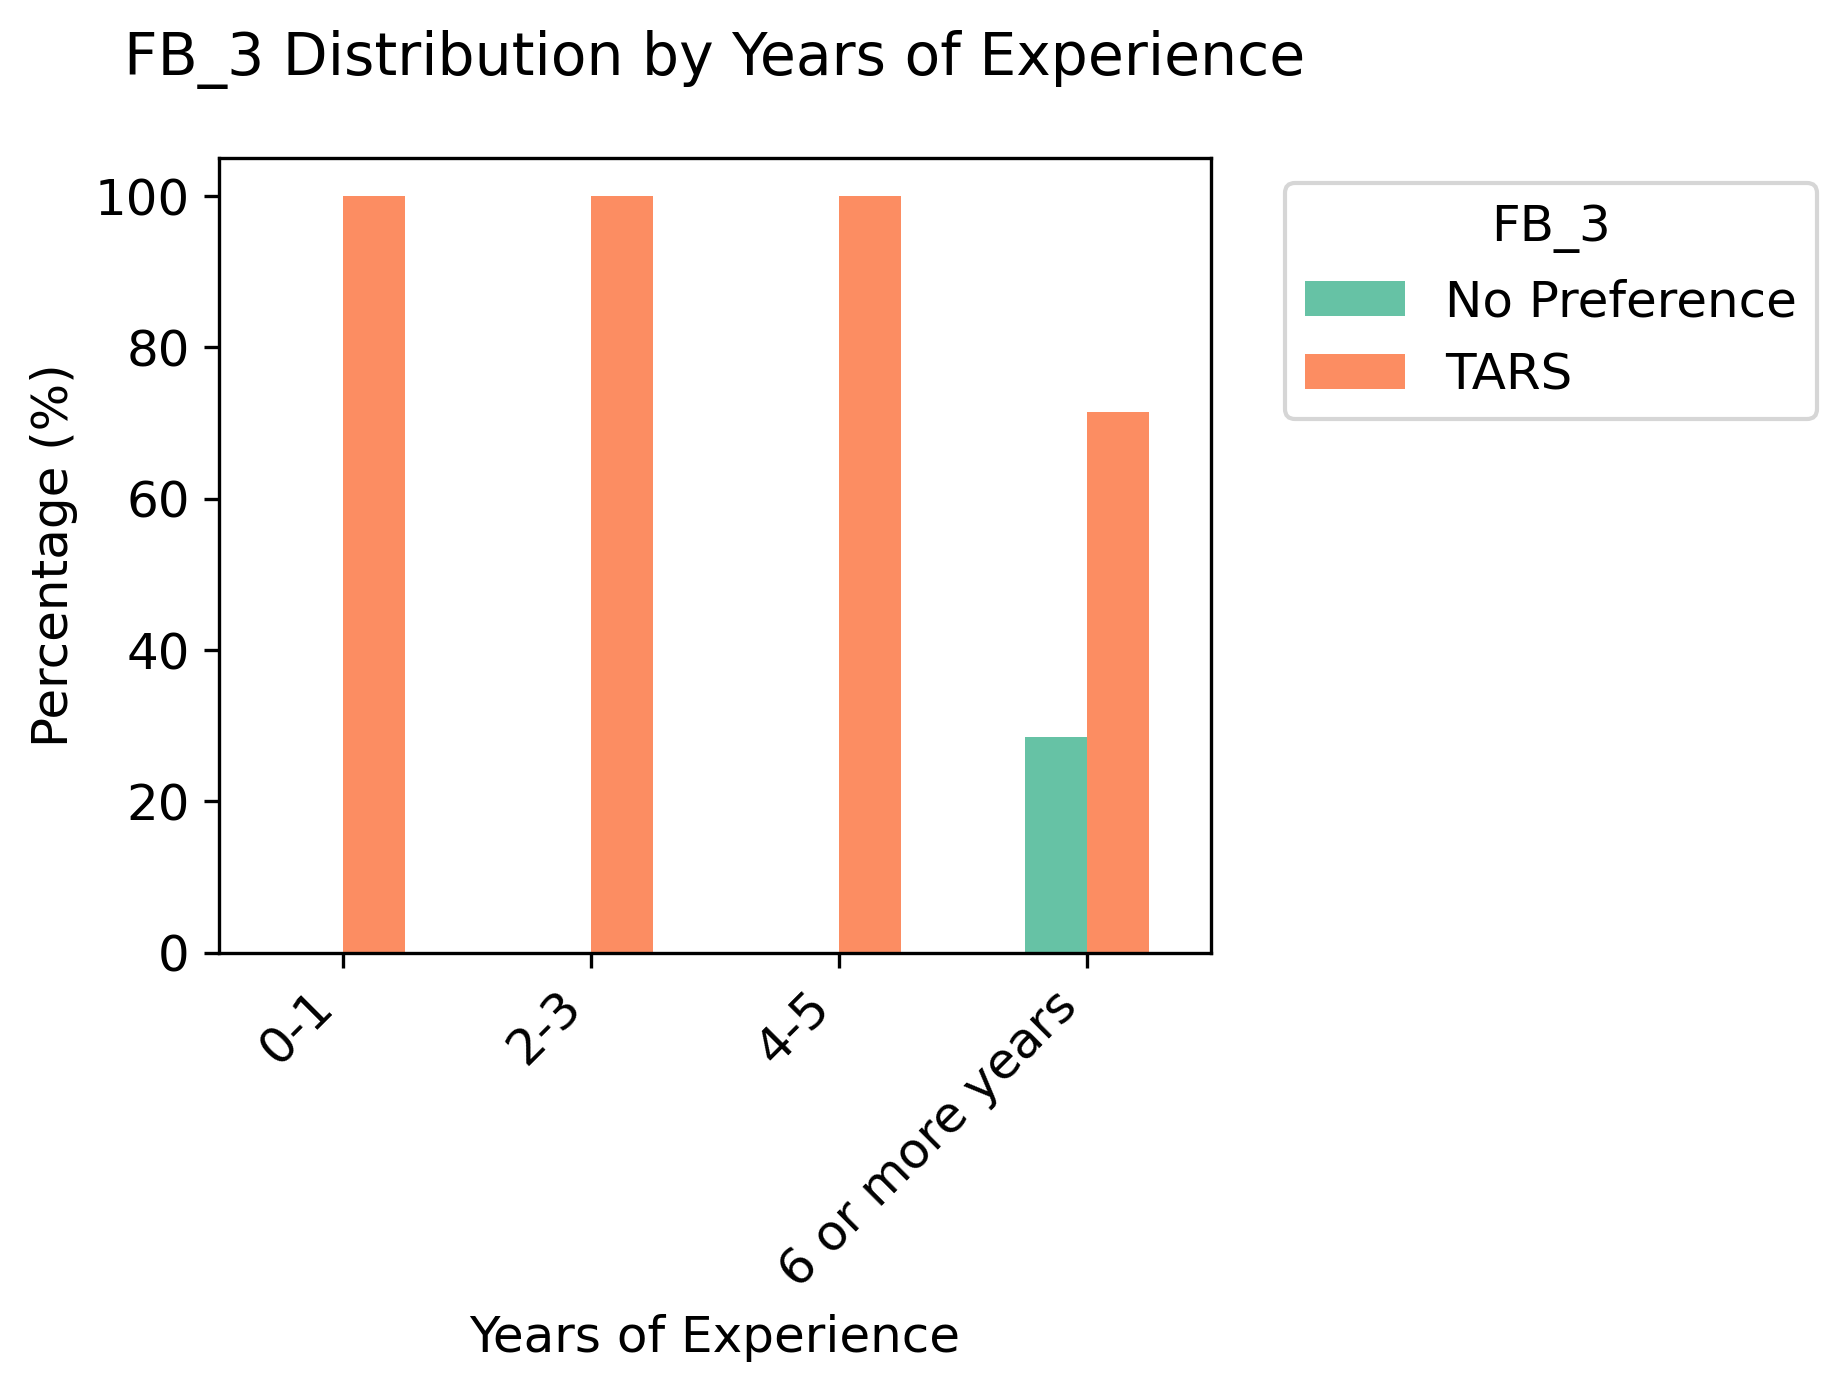


4. FB_3 vs Frequency of AI Tool Usage
--------------------------------------------------------------------------------
FB_3                                      No Preference   TARS
Frequency For AI Tools                                        
Always (nearly every working hour)                  0.0  100.0
Frequently (daily)                                 12.5   87.5
Occasionally (Few Times every two weeks)           33.3   66.7
Rarely (Few Times a month)                          0.0  100.0
Very Frequently (multiple times a day)              0.0  100.0


<Figure size 3600x1800 with 0 Axes>

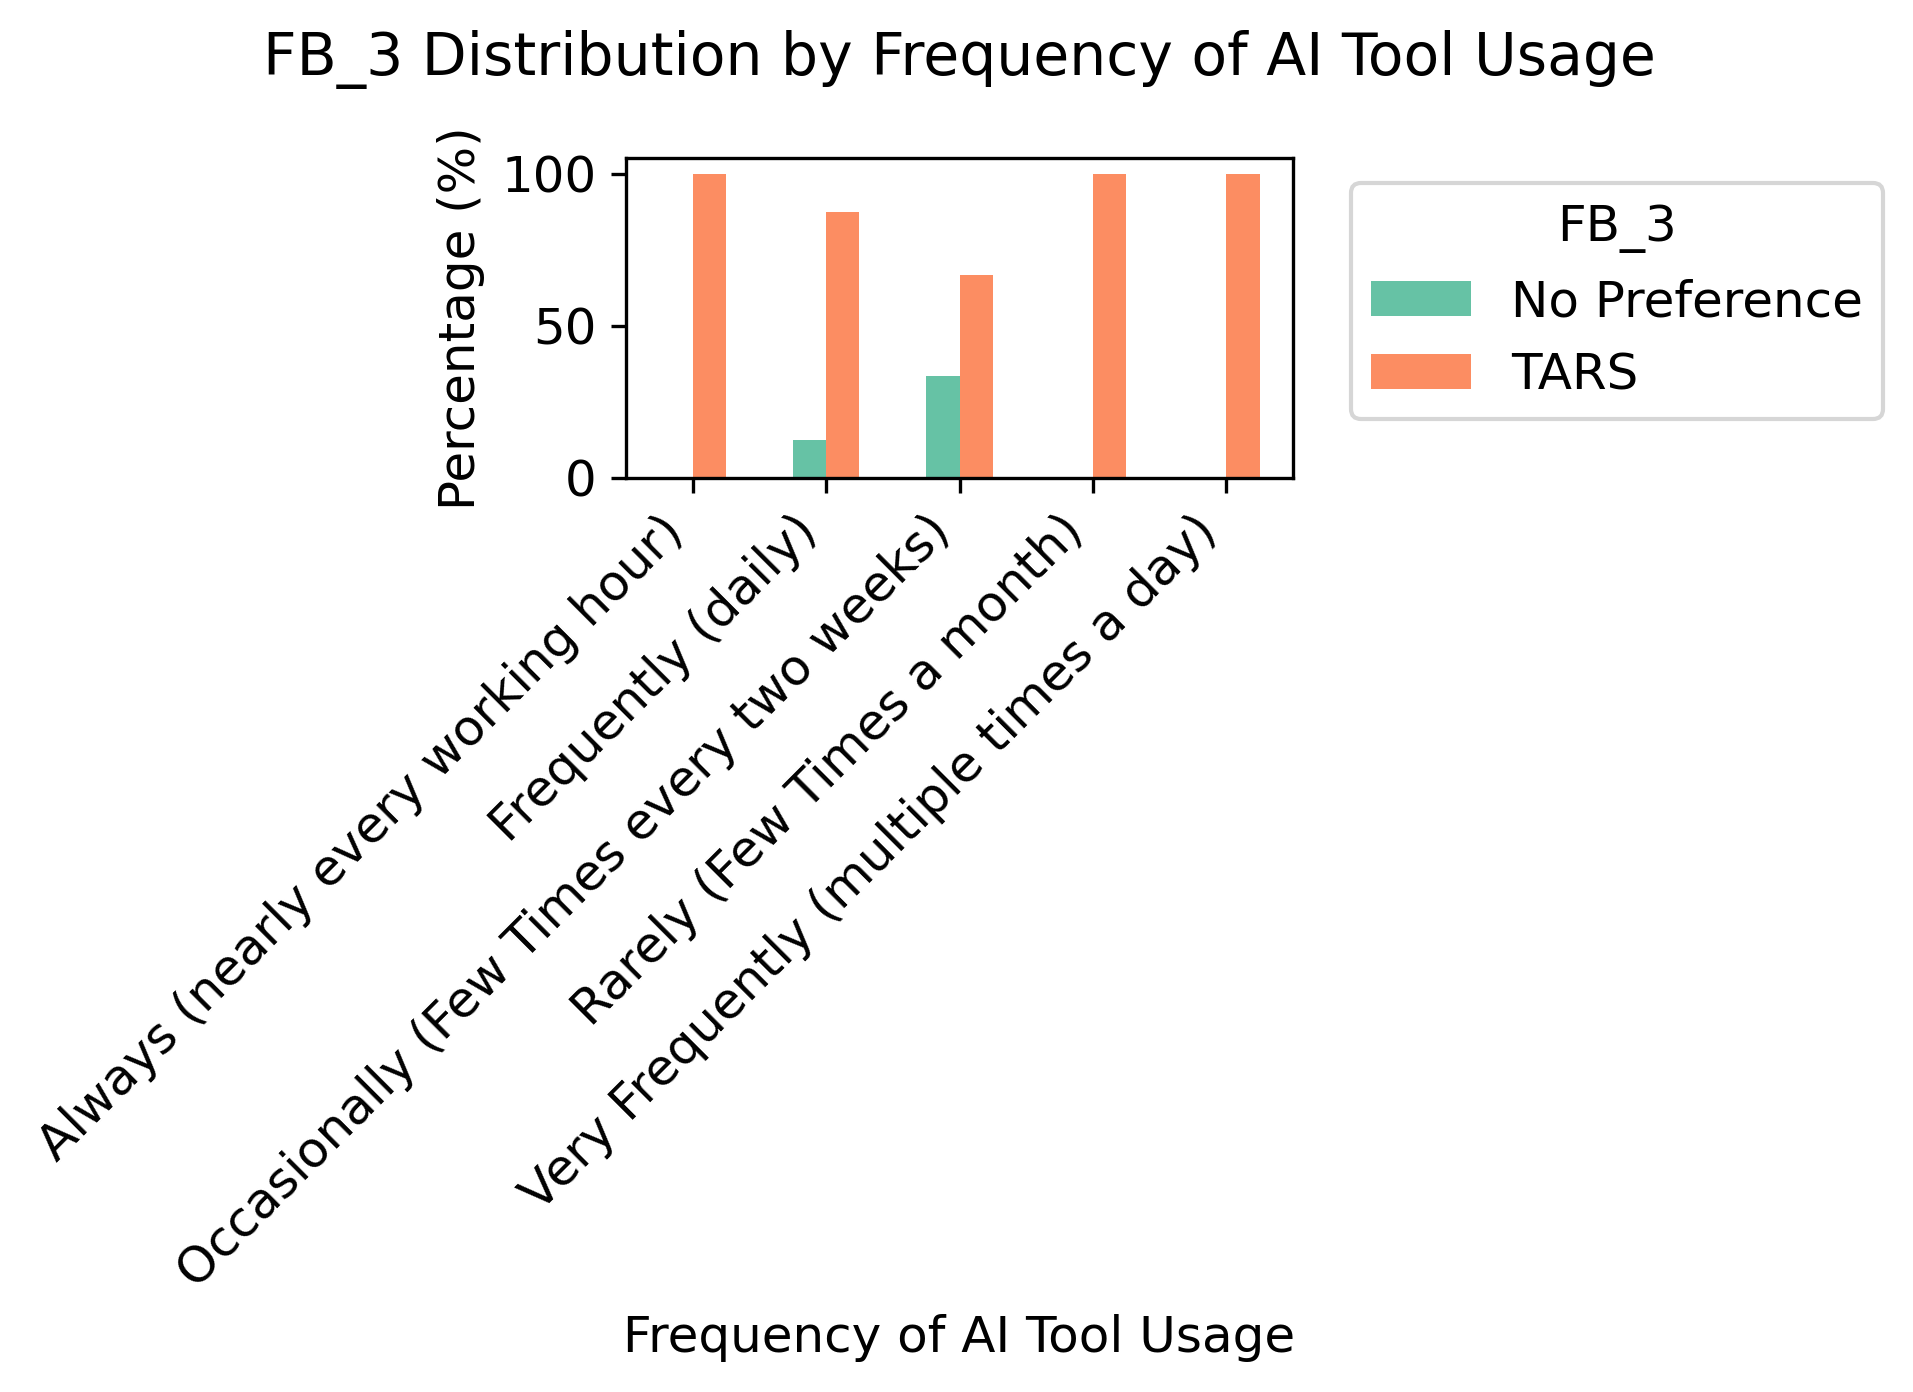


5. FB_3 vs AI Tools in IDE
--------------------------------------------------------------------------------
FB_3             No Preference  TARS
AI Tools in IDE                     
No                        16.7  83.3
Yes                        8.3  91.7


<Figure size 3600x1800 with 0 Axes>

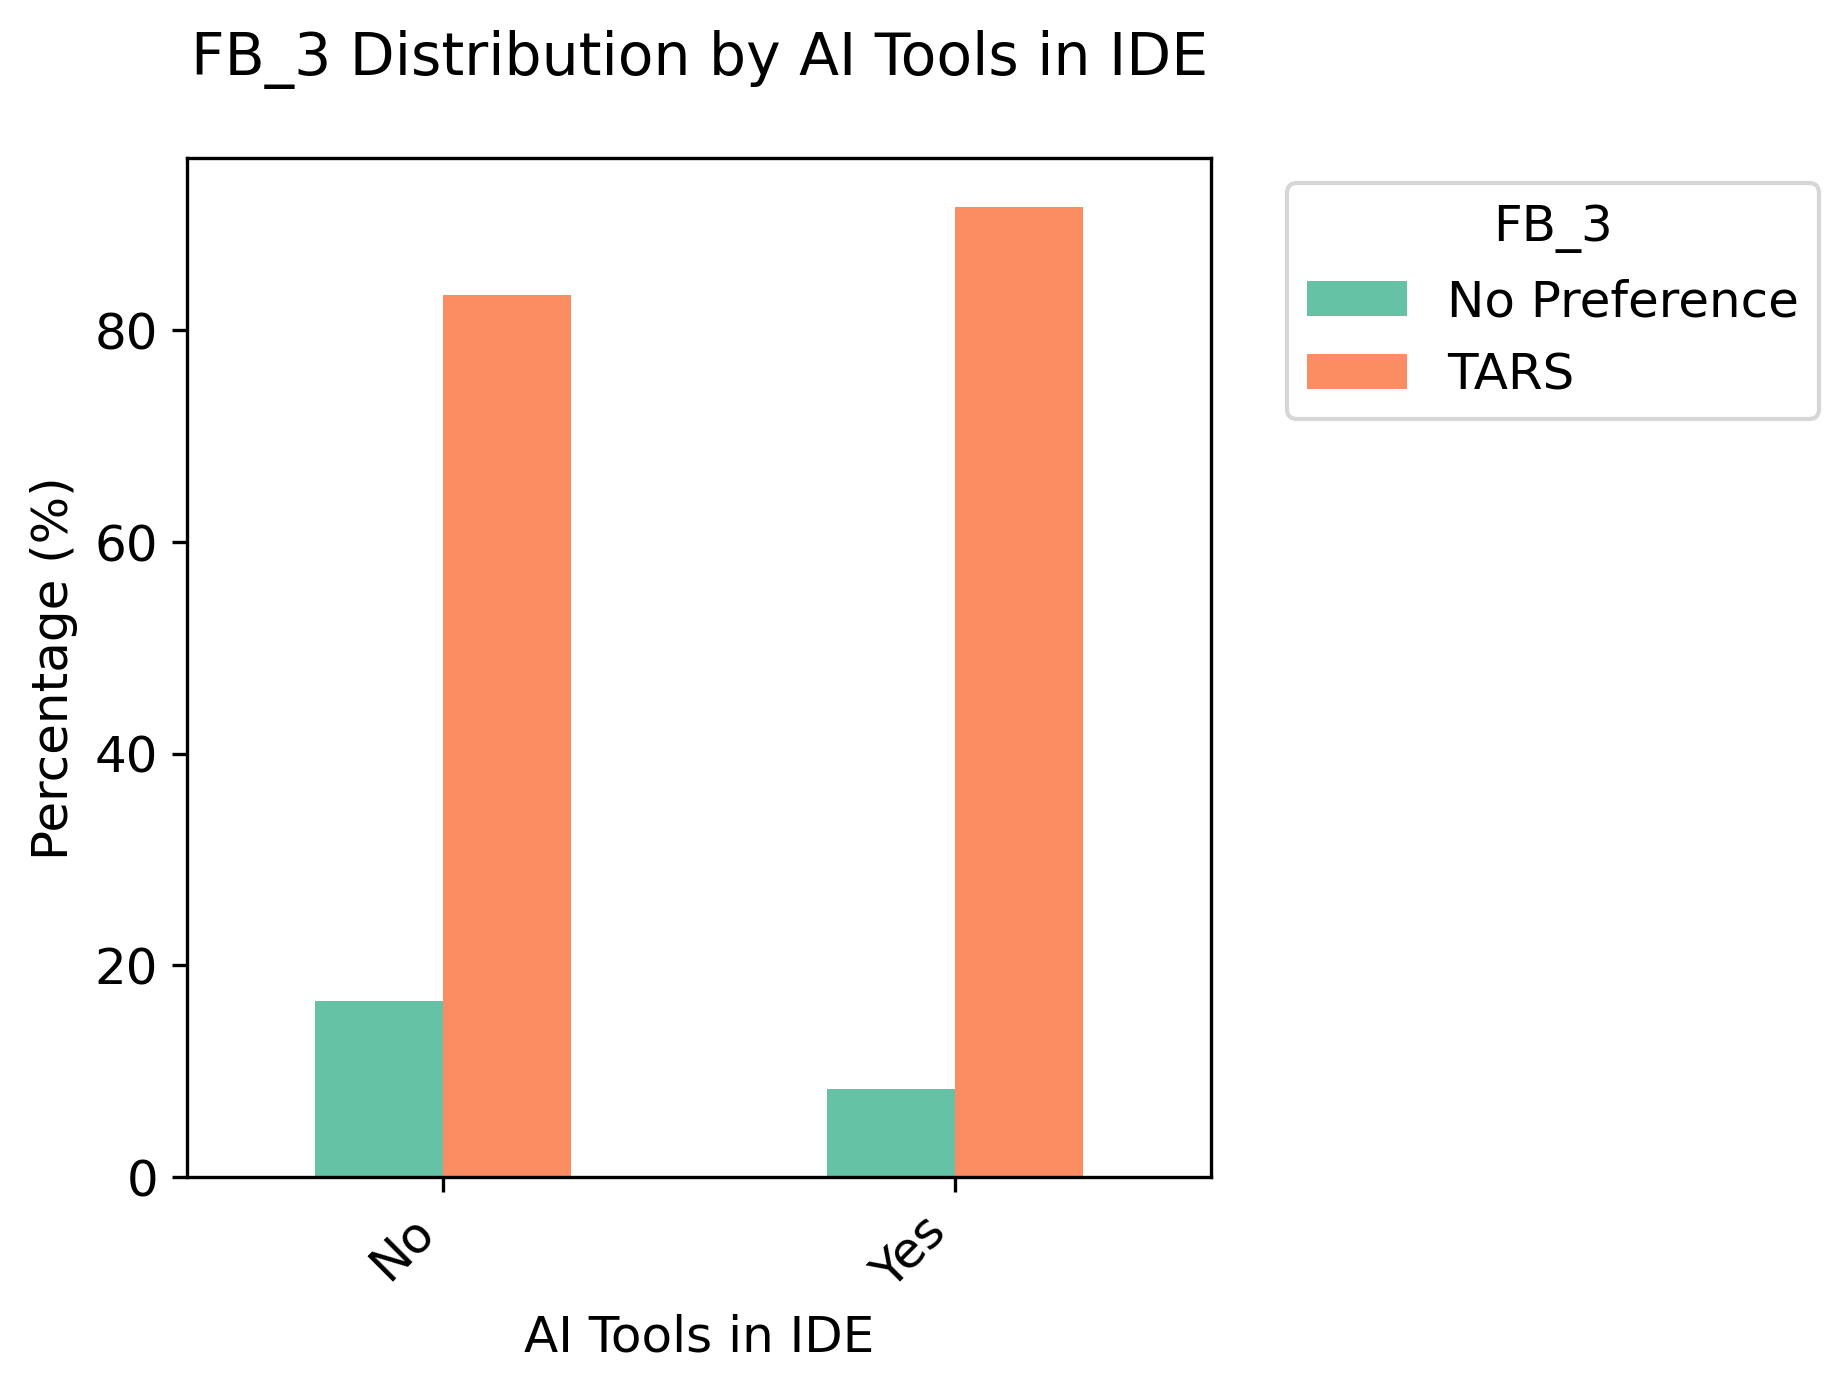


6. Correlation Heatmap
--------------------------------------------------------------------------------
Current Status: Chi-square = 18.00, p-value = 0.0029
Field of study: Chi-square = 0.70, p-value = 0.7063
Years of Experience: Chi-square = 3.54, p-value = 0.3162
Frequency For AI Tools: Chi-square = 2.39, p-value = 0.6643
AI Tools in IDE: Chi-square = 0.00, p-value = 1.0000

7. Overall FB_3 Distribution
--------------------------------------------------------------------------------
FB_3
TARS             88.9
No Preference    11.1
Name: proportion, dtype: float64


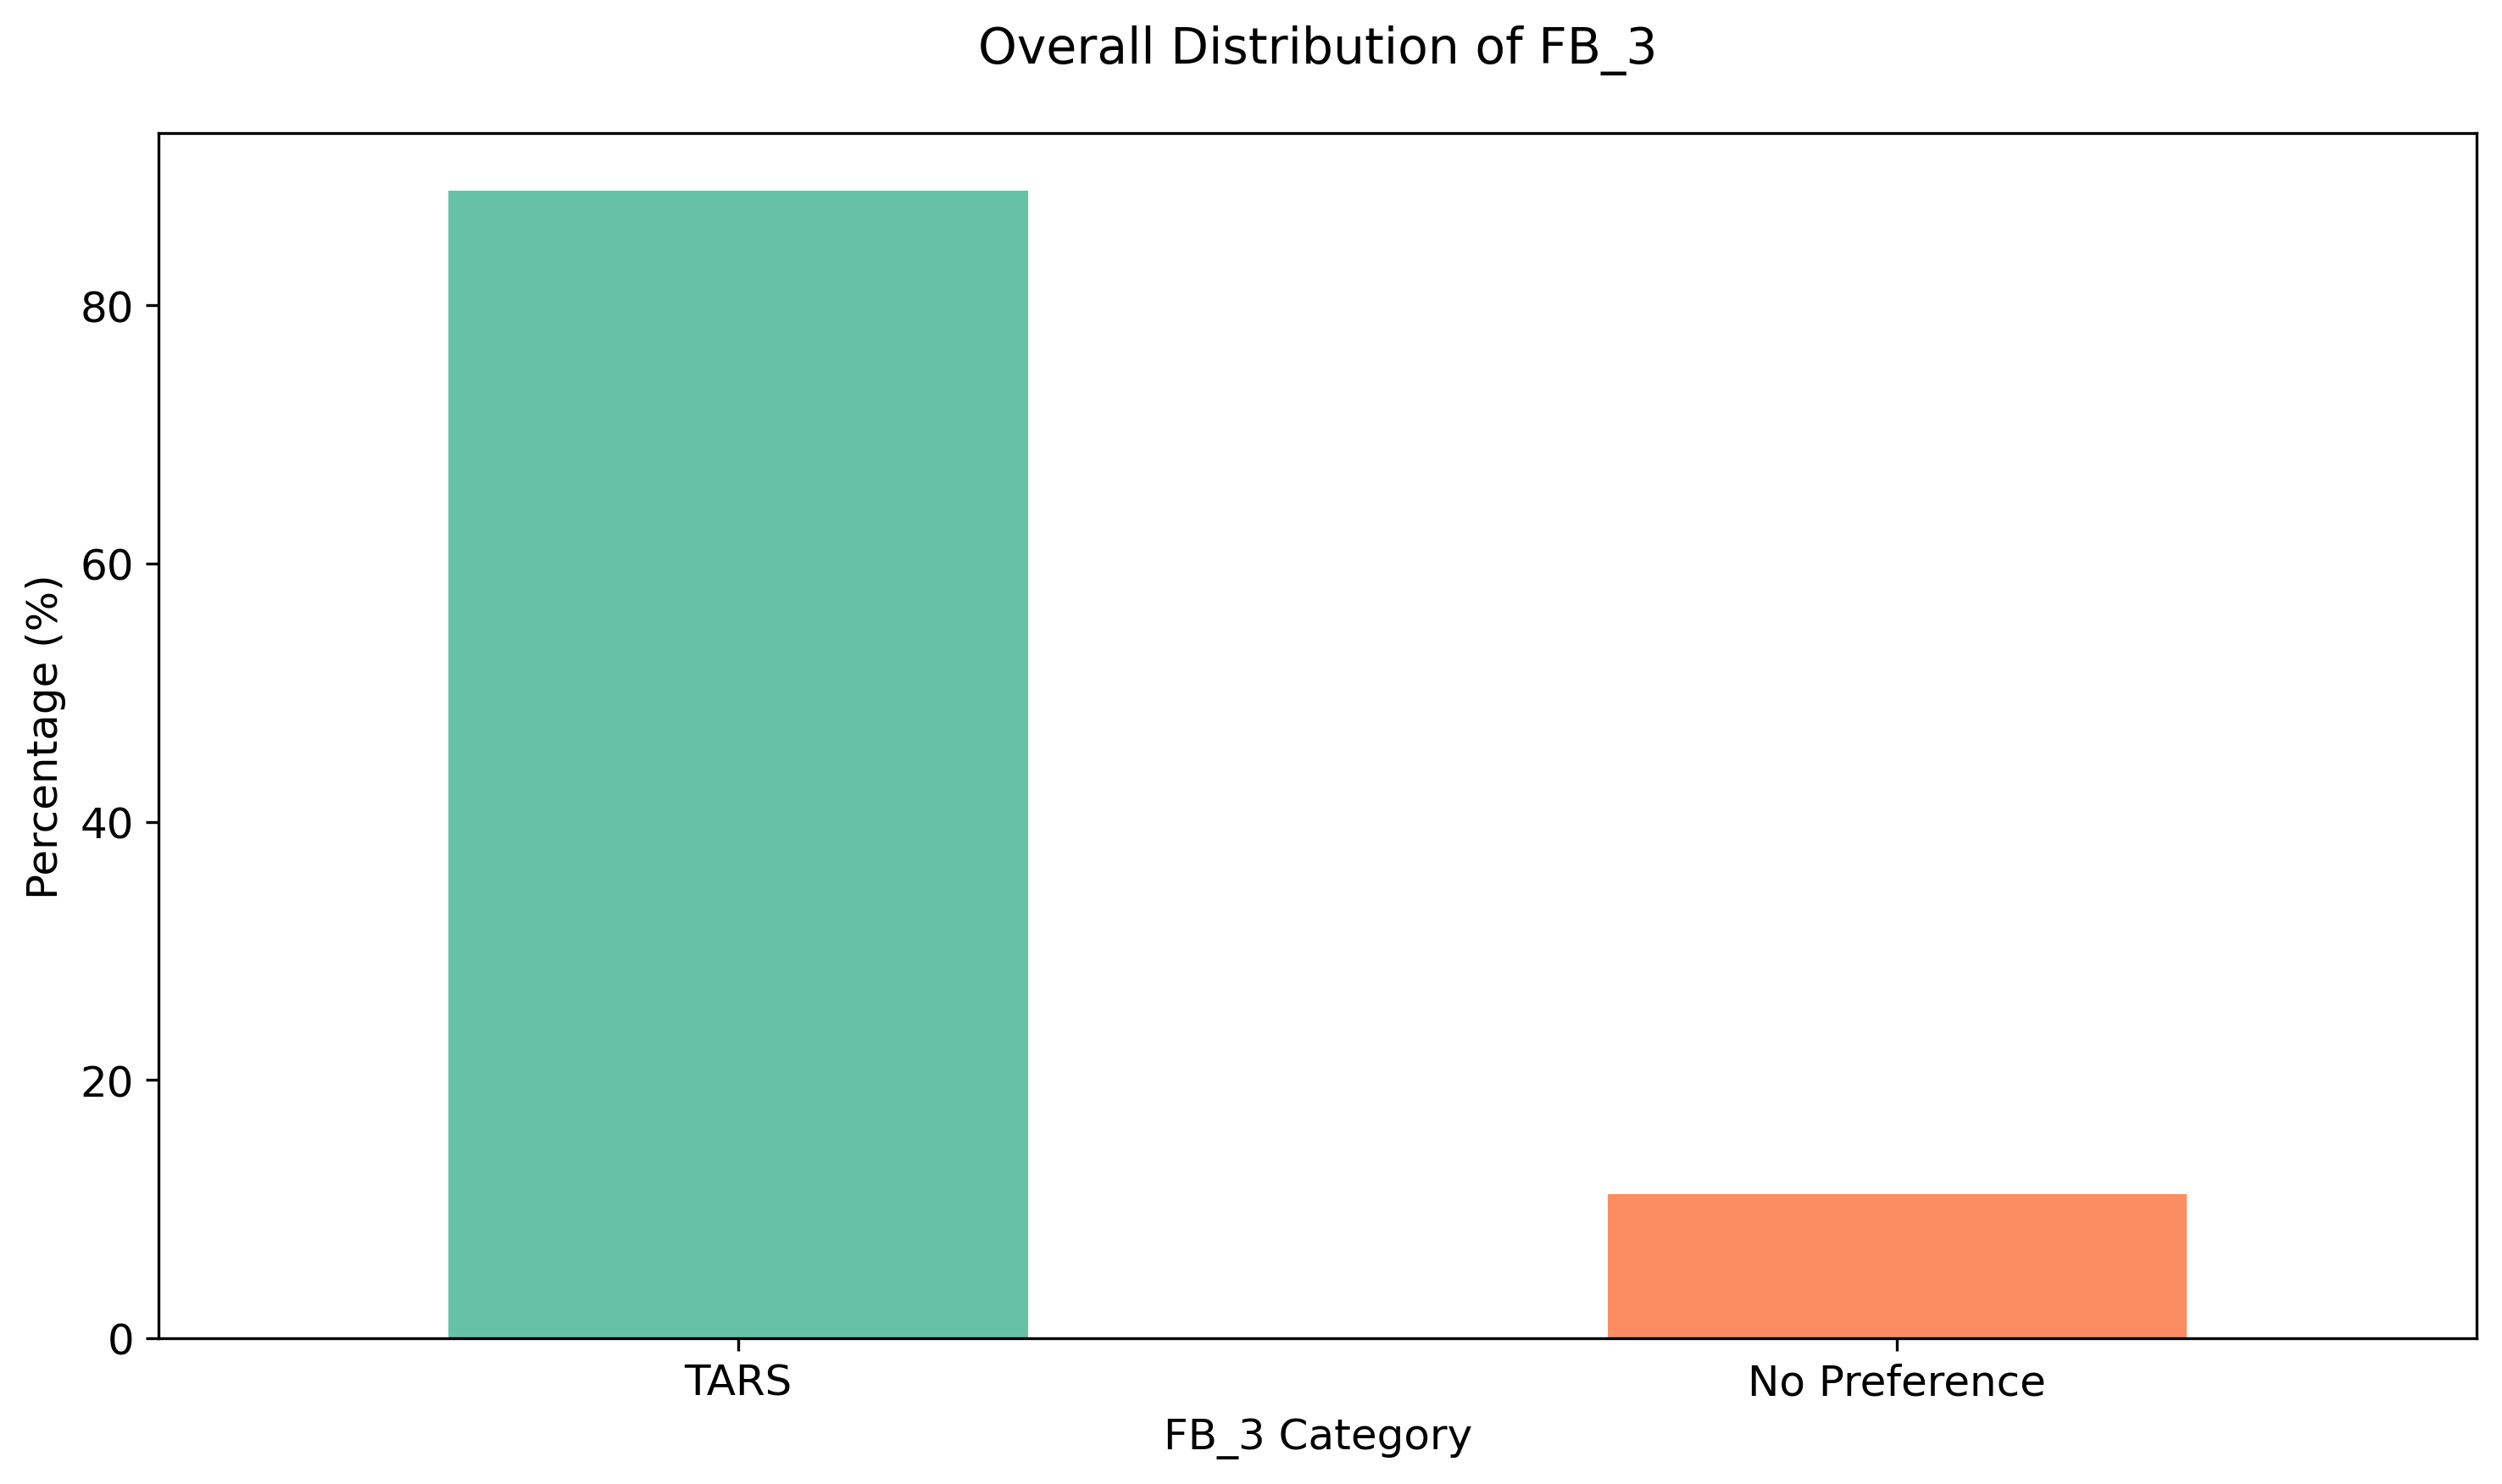


Analysis complete! All figures saved in 'figures/fb3/' directory


In [201]:
# Crea la directory se non esiste
os.makedirs("figures/fb3", exist_ok=True)

# Analisi delle relazioni tra FB_3 e altre colonne

print("="*80)
print("CROSS-COLUMN ANALYSIS: FB_3 vs Other Variables")
print("="*80)

# 1. FB_3 vs Current Status
print("\n1. FB_3 vs Current Status")
print("-"*80)
cross_status = pd.crosstab(df['Current Status'], df['FB_3'], normalize='index') * 100
print(cross_status.round(1))

plt.figure(figsize=(12, 6))
cross_status.plot(kind='bar', stacked=False, color=sns.color_palette("Set2", 3))
plt.title('FB_3 Distribution by Current Status', fontsize=14, pad=20)
plt.xlabel('Current Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='FB_3', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("figures/fb3/fb3_vs_current_status.pdf", format='pdf', bbox_inches='tight')
plt.show()

# 2. FB_3 vs Field of Study
print("\n2. FB_3 vs Field of Study")
print("-"*80)
cross_field = pd.crosstab(df['Field of study'], df['FB_3'], normalize='index') * 100
print(cross_field.round(1))

plt.figure(figsize=(12, 6))
cross_field.plot(kind='bar', stacked=False, color=sns.color_palette("Set2", 3))
plt.title('FB_3 Distribution by Field of Study', fontsize=14, pad=20)
plt.xlabel('Field of Study', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='FB_3', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("figures/fb3/fb3_vs_field_of_study.pdf", format='pdf', bbox_inches='tight')
plt.show()

# 3. FB_3 vs Years of Experience
print("\n3. FB_3 vs Years of Experience")
print("-"*80)
cross_experience = pd.crosstab(df['Years of Experience'], df['FB_3'], normalize='index') * 100
print(cross_experience.round(1))

plt.figure(figsize=(12, 6))
cross_experience.plot(kind='bar', stacked=False, color=sns.color_palette("Set2", 3))
plt.title('FB_3 Distribution by Years of Experience', fontsize=14, pad=20)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='FB_3', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("figures/fb3/fb3_vs_years_of_experience.pdf", format='pdf', bbox_inches='tight')
plt.show()

# 4. FB_3 vs Frequency of AI Tool Usage
print("\n4. FB_3 vs Frequency of AI Tool Usage")
print("-"*80)
cross_frequency = pd.crosstab(df['Frequency For AI Tools'], df['FB_3'], normalize='index') * 100
print(cross_frequency.round(1))

plt.figure(figsize=(12, 6))
cross_frequency.plot(kind='bar', stacked=False, color=sns.color_palette("Set2", 3))
plt.title('FB_3 Distribution by Frequency of AI Tool Usage', fontsize=14, pad=20)
plt.xlabel('Frequency of AI Tool Usage', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='FB_3', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("figures/fb3/fb3_vs_frequency_ai_tools.pdf", format='pdf', bbox_inches='tight')
plt.show()

# 5. FB_3 vs AI Tools in IDE
print("\n5. FB_3 vs AI Tools in IDE")
print("-"*80)
cross_ide = pd.crosstab(df['AI Tools in IDE'], df['FB_3'], normalize='index') * 100
print(cross_ide.round(1))

plt.figure(figsize=(12, 6))
cross_ide.plot(kind='bar', stacked=False, color=sns.color_palette("Set2", 3))
plt.title('FB_3 Distribution by AI Tools in IDE', fontsize=14, pad=20)
plt.xlabel('AI Tools in IDE', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='FB_3', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("figures/fb3/fb3_vs_ai_tools_ide.pdf", format='pdf', bbox_inches='tight')
plt.show()

# 6. Heatmap generale delle correlazioni
print("\n6. Correlation Heatmap")
print("-"*80)

# Crea una matrice per il chi-square test
from scipy.stats import chi2_contingency

columns_to_analyze = ['Current Status', 'Field of study', 'Years of Experience', 
                      'Frequency For AI Tools', 'AI Tools in IDE']

chi2_results = {}
for col in columns_to_analyze:
    contingency_table = pd.crosstab(df[col], df['FB_3'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = {'chi2': chi2, 'p_value': p_value}
    print(f"{col}: Chi-square = {chi2:.2f}, p-value = {p_value:.4f}")

# 7. Distribuzione complessiva di FB_3
print("\n7. Overall FB_3 Distribution")
print("-"*80)
fb3_dist = df['FB_3'].value_counts(normalize=True) * 100
print(fb3_dist.round(1))

plt.figure(figsize=(10, 6))
fb3_dist.plot(kind='bar', color=sns.color_palette("Set2", 3))
plt.title('Overall Distribution of FB_3', fontsize=14, pad=20)
plt.xlabel('FB_3 Category', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("figures/fb3/fb3_overall_distribution.pdf", format='pdf', bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("Analysis complete! All figures saved in 'figures/fb3/' directory")
print("="*80)